<a href="https://colab.research.google.com/github/fabianhuertas1992/DatosML/blob/main/Machine%20Learning/ML_Parcelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este modelo se realiza una agrupacion de los datos por parcelas para poder realizar modelos de entrenamiento



Este código entrena y compara tres modelos de machine learning (Regresión Lineal, Random Forest, y XGBoost) para predecir la biomasa (Mg/ha) usando características como el diámetro del árbol, altura, área y NDVI.

Se entrenan los modelos y se valida su precisión usando R² (qué tan bien predicen) y MSE (error de predicción).
Se generan gráficos que muestran la comparación entre los valores reales de biomasa y las predicciones de cada modelo.
El código evalúa qué modelo predice mejor la biomasa comparando las predicciones y visualizándolas gráficamente.

## Librerias y Conexión con Datos

In [ ]:
# @title Instalacion de librerias
!pip install rasterio
!pip install SQLAlchemy aiomysql
!pip install geopandas
!pip install folium
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
# @title Montar acceso Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Conectar con DB de Kobo
#Importa los datos de KOBOTOOLS y crea un DF
#Archivo KOBO aplicacion
import pandas as pd

# URL del archivo CSV generado por KoboToolbox
url = "https://kf.kobotoolbox.org/api/v2/assets/a44ciRM8GHh5XHyJu4XEKn/export-settings/esprBMMCYyNhWz6bF8YKTqy/data.csv"  # Reemplaza con la URL real del archivo CSV

# Leer el archivo CSV usando pandas con delimitador de punto y coma
df = pd.read_csv(url, delimiter=';')
df

,"El Ministerio de Ciencia, Tecnología e Innovación, a través del Sistema General de Regalías (SGR), viabilizó, priorizó y aprobó el proyecto BPIN 2022000100005 denominado “Implementación de acciones para la protección de cuencas de agua y suelos a partir de reforestación con tecnologías emergentes y biotecnología en la región llanos orientales en los departamentos de Meta y Arauca”, designando como entidad ejecutora a la UNIVERSIDAD COOPERATIVA DE COLOMBIA, identificada con NIT 860.029.924-7 y designada como co-ejecutorora a la CORPORACION INNPRENDE identificada con NIT 901243061-0. En el proceso de ejecución del proyecto, adelantamos consultas relacionadas con el mismo, como el formulario que se presenta a continuación:\nEste formulario facilita el protocolo de caracterización de las especies del bosque",Seleccione el nombre de su proyecto en Plataforma,Diligenciado por,ID Conglomerado,Fecha de diligenciamiento,ID Subparcela,No ID individuo,Seleccione la categoría por tamaño del individuo,Foto de la identificación del árbol,Foto de la identificación del árbol_URL,...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,NaN,ELTESORODEBREMEN,Jose Quiñones,3,2023-05-22,3,NaN,Fustales Grandes (DAP ≥ 30 cm),IMG_20230522_103221_465-10_32_45-9_52_57.webp,https://kc.kobotoolbox.org/media/original?medi...,...,241886028,fa2fb73e-4199-450f-ae55-840994aa24c1,2023-05-29 14:54:52,NaN,NaN,submitted_via_web,NaN,vP79Ps3bBNoBCBpSuJFkcq,NaN,1
1,NaN,El Aguador,Sebastian Plata,1,2023-05-15,1,1.0,Fustales (30 cm > DAP ≥ 10 cm),1684163266955-10_1_7.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,241886878,7b354705-ad2f-490b-855d-ac7b63d075b1,2023-05-29 14:56:48,NaN,NaN,submitted_via_web,suanblockchain,vP79Ps3bBNoBCBpSuJFkcq,NaN,2
2,NaN,El Aguador,Sebastian Plata,1,2023-05-15,1,8.0,Fustales (30 cm > DAP ≥ 10 cm),1684166403215-19_49_16.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,241992703,8de91169-a043-4cf2-9518-11c5dc8c7910,2023-05-30 00:51:46,NaN,NaN,submitted_via_web,moxie,vP79Ps3bBNoBCBpSuJFkcq,NaN,3
3,NaN,El Aguador,Sebastian Plata,1,2023-05-15,1,6.0,Fustales Grandes (DAP ≥ 30 cm),1684165653222-18_50_25.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,242623494,382bb858-4fbe-4333-bab7-0a78c284b340,2023-05-31 23:51:41,NaN,NaN,submitted_via_web,suanblockchain,vP79Ps3bBNoBCBpSuJFkcq,NaN,4
4,NaN,El Aguador,Sebastian Plata,1,2023-05-15,1,2.0,Fustales (30 cm > DAP ≥ 10 cm),1684163686851-18_53_45.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,242623797,a6efa90a-3ef0-4984-91f8-60c03085a367,2023-05-31 23:55:28,NaN,NaN,submitted_via_web,suanblockchain,vP79Ps3bBNoBCBpSuJFkcq,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,NaN,ACAP ALABANIA PROYECTO VJOSE-NARTE A/R,Jhony López,1,2024-08-22,4,409.0,Fustales Grandes (DAP ≥ 30 cm),image-16_55_51.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,374834627,76b2b49f-32fd-4bef-bff3-820355f3c3a9,2024-08-23 12:23:59,NaN,NaN,submitted_via_web,NaN,v8zoTcwyYNqhruKiGTxepa,NaN,524
524,NaN,ACAP ALABANIA PROYECTO VJOSE-NARTE A/R,Carlos soto,1,2024-08-22,3,405.0,Fustales (30 cm > DAP ≥ 10 cm),image-16_48_18.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,374906505,15a81e26-e569-46a2-912b-105e482ff52e,2024-08-23 15:19:03,NaN,NaN,submitted_via_web,NaN,v8zoTcwyYNqhruKiGTxepa,NaN,525
525,NaN,ACAP ALABANIA PROYECTO VJOSE-NARTE A/R,Carlos Soto,1,2024-08-22,3,407.0,Fustales (30 cm > DAP ≥ 10 cm),image-16_51_19.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,374906742,eb663ad0-9118-4990-b1bb-1ca9b064a6e8,2024-08-23 15:19:40,NaN,NaN,submitted_via_web,NaN,v8zoTcwyYNqhruKiGTxepa,NaN,526
526,NaN,ACAP ALABANIA PROYECTO VJOSE-NARTE A/R,Carlos Soto,1,2024-08-22,3,408.0,Fustales (30 cm > DAP ≥ 10 cm),image-16_54_25.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,374908049,921ebfc9-96ec-4a34-9def-427b9bb64737,2024-08-23 15:23:16,NaN,NaN,submitted_via_web,NaN,v8z

In [ ]:
# @title Seleccionar únicamente las columnas de ubicación
df_filtered = df[['ID Subparcela','Ubicación GPS','_Ubicación GPS_latitude', '_Ubicación GPS_longitude','_Ubicación GPS_altitude','_Ubicación GPS_precision',
                  'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt','Azimut','Distancia',
                  'Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.)',
                  'HT altura del árbol o del fuste 1 (mt)']]
df_filtered

,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt)
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.100000,10.200000,39.0,0.0,0,NaN,15
1,1,4.9317239 -75.0297909 1411.7 3.9000000953674316,4.931724,-75.029791,1411.700000,3.900000,12.0,0.0,0,NaN,3
2,1,4.93175 -75.0297246 1419 4.328999996185303,4.931750,-75.029725,1419.000000,4.329000,18.2,NaN,NaN,NaN,2.5
3,1,4.93183 -75.0297517 1419.2 3.9000000953674316,4.931830,-75.029752,1419.200000,3.900000,97.4,NaN,NaN,NaN,12
4,1,4.931775 -75.029688 1431.1000000000001 3.90000...,4.931775,-75.029688,1431.100000,3.900000,24.0,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...
523,4,6.595624 -71.693078 246.48771116137505 7.95790...,6.595624,-71.693078,246.487711,7.957906,44.0,26.0,12,NaN,12
524,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,15.0,NaN,11,NaN,12
525,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,15.0,NaN,11,NaN,15
526,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,22.0,NaN,1,NaN,15


In [ ]:
# @title total de nulos NAN
df_filtered.isna().sum()

,0
ID Subparcela,0
Ubicación GPS,260
_Ubicación GPS_latitude,260
_Ubicación GPS_longitude,260
_Ubicación GPS_altitude,260
_Ubicación GPS_precision,260
"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",35
Azimut,273
Distancia,265
Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),528


In [ ]:
# @title Reemplaza nulos por ceros
df_filtered = df_filtered.fillna(0)
df.update(df_filtered)
df_filtered.isna().sum()

,0
ID Subparcela,0
Ubicación GPS,0
_Ubicación GPS_latitude,0
_Ubicación GPS_longitude,0
_Ubicación GPS_altitude,0
_Ubicación GPS_precision,0
"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",0
Azimut,0
Distancia,0
Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),0


In [ ]:
data = df_filtered

In [ ]:
data.columns

Index(['ID Subparcela', 'Ubicación GPS', '_Ubicación GPS_latitude',
       '_Ubicación GPS_longitude', '_Ubicación GPS_altitude',
       '_Ubicación GPS_precision',
       'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt',
       'Azimut', 'Distancia',
       'Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.)',
       'HT altura del árbol o del fuste 1 (mt)'],
      dtype='object')

# Cálculo Biomasa Datos Kobo

In [ ]:
# @title  Biomasa registros
import numpy as np

def calcular_biomasa(dap, densidad=0.534):
    # Verifica que los valores no sean nulos o incorrectos
    if pd.isnull(dap) or dap <= 0:
        return np.nan

    # Calcula la biomasa usando la fórmula
    ln_biomasa = 3.652 - 1.697 * np.log(dap) + 1.169 * (np.log(dap))**2 - 0.122 * (np.log(dap))**3 + 1.285 * np.log(densidad)
    biomasa = np.exp(ln_biomasa)
    return biomasa

    # La columna de DAP se llama 'Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt'
data['Biomasa (kg)'] = data['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt'].apply(calcular_biomasa)

biomasa_total = data['Biomasa (kg)'].sum()
print(f'Biomasa total: {biomasa_total:.2f} kg')
data

Biomasa total: 91527.91 kg


,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt),Biomasa (kg)
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.100000,10.200000,39.0,0.0,0,0.0,15,555.487004
1,1,4.9317239 -75.0297909 1411.7 3.9000000953674316,4.931724,-75.029791,1411.700000,3.900000,12.0,0.0,0,0.0,3,53.267172
2,1,4.93175 -75.0297246 1419 4.328999996185303,4.931750,-75.029725,1419.000000,4.329000,18.2,0.0,0,0.0,2.5,119.489181
3,1,4.93183 -75.0297517 1419.2 3.9000000953674316,4.931830,-75.029752,1419.200000,3.900000,97.4,0.0,0,0.0,12,2624.525247
4,1,4.931775 -75.029688 1431.1000000000001 3.90000...,4.931775,-75.029688,1431.100000,3.900000,24.0,0.0,0,0.0,6,209.266439
...,...,...,...,...,...,...,...,...,...,...,...,...
523,4,6.595624 -71.693078 246.48771116137505 7.95790...,6.595624,-71.693078,246.487711,7.957906,44.0,26.0,12,0.0,12,701.406182
524,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,15.0,0.0,11,0.0,12,81.476629
525,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,15.0,0.0,11,0.0,15,81.476629
526,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,22.0,0.0,1,0.0,15,175.303444


In [ ]:
# @title Cálculo de Biomasa del los puntos dentro del polígono
import requests
import folium
from shapely.geometry import shape, Point
from shapely.ops import transform
from pyproj import Transformer
from IPython.display import IFrame
import pandas as pd
import numpy as np

# Función para calcular la biomasa
def calcular_biomasa(dap, densidad=0.534):
    if pd.isnull(dap) or dap <= 0:
        return np.nan
    ln_biomasa = 3.652 - 1.697 * np.log(dap) + 1.169 * (np.log(dap))**2 - 0.122 * (np.log(dap))**3 + 1.285 * np.log(densidad)
    biomasa = np.exp(ln_biomasa)
    return biomasa

# Función para obtener el polígono basado en coordenadas
def obtener_poligono_por_geometria(lat, lon, radio=10):
    BASE_URL = "https://services2.arcgis.com/RVvWzU3lgJISqdke/ArcGIS/rest/services/CATASTRO_PUBLICO_Junio_30_2024/FeatureServer/"
    tableNumber = 14
    COMMAND = "query"

    query = {
        'geometry': f"{lon},{lat}",
        'geometryType': 'esriGeometryPoint',
        'inSR': '4326',
        'spatialRel': 'esriSpatialRelIntersects',
        'distance': radio,
        'units': 'esriSRUnit_Meter',
        'returnGeometry': 'true',
        'outFields': '*',
        'f': 'geojson',
        'resultRecordCount': 1
    }

    URL = f"{BASE_URL}/{tableNumber}/{COMMAND}"
    response = requests.get(URL, params=query)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Cargar los datos y calcular la biomasa
data['Biomasa (kg)'] = data['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt'].apply(calcular_biomasa)

# Definir la ID Catastral objetivo
id_catastral_objetivo = '632720000000000010644000000000'
poligono_encontrado = None

# Iterar sobre las filas del DataFrame para buscar el polígono de la ID Catastral específica
for idx, row in data.iterrows():
    lat = row['_Ubicación GPS_latitude']
    lon = row['_Ubicación GPS_longitude']

    resultado = obtener_poligono_por_geometria(lat, lon)
    if resultado and resultado['features']:
        for feature in resultado['features']:
            id_catastral = feature['properties'].get('CODIGO')
            if id_catastral == id_catastral_objetivo:
                poligono_encontrado = feature['geometry']
                break
    if poligono_encontrado:
        break

# Verificar si se encontró el polígono y calcular el área en hectáreas
if poligono_encontrado:
    # Convertir la geometría del polígono a objeto Shapely
    poligono_principal = shape(poligono_encontrado)

    # Transformar las coordenadas geográficas (EPSG:4326) a un sistema métrico (EPSG:3857)
    transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
    poligono_transformado = transform(transformer.transform, poligono_principal)

    # Calcular el área del polígono transformado en metros cuadrados y convertir a hectáreas
    area_poligono_principal_m2 = poligono_transformado.area
    area_poligono_principal_ha = area_poligono_principal_m2 / 10000  # Convertir de m² a hectáreas

    # Filtrar subparcelas que caen dentro del polígono
    subparcelas_filtradas = data[data.apply(lambda row: poligono_principal.contains(Point(row['_Ubicación GPS_longitude'], row['_Ubicación GPS_latitude'])), axis=1)]

    # Crear un DataFrame con los datos filtrados
    dataframe_filtrado = pd.DataFrame(subparcelas_filtradas)

    # Calcular la biomasa total sumando todas las subparcelas
    biomasa_total_kg = dataframe_filtrado['Biomasa (kg)'].sum()

    # Calcular el área total estimada de subparcelas
    radio = 15  # Radio en metros
    area_subparcela_m2 = np.pi * (radio ** 2)
    area_total_subparcelas_m2 = area_subparcela_m2 * len(dataframe_filtrado)
    area_total_subparcelas_ha = area_total_subparcelas_m2 / 10000  # Convertir de m² a hectáreas

    # Convertir la biomasa de kg a megagramos (Mg) y luego a Mg/ha para el área total
    biomasa_total_mg = biomasa_total_kg / 1000  # Convertir kg a Mg
    biomasa_total_mg_ha = biomasa_total_mg / area_total_subparcelas_ha  # Convertir a Mg/ha

    # Crear un mapa centrado en la primera ubicación encontrada
    lat_central = dataframe_filtrado['_Ubicación GPS_latitude'].mean()
    lon_central = dataframe_filtrado['_Ubicación GPS_longitude'].mean()
    mapa = folium.Map(location=[lat_central, lon_central], zoom_start=15)

    # Agregar el polígono principal al mapa
    folium.GeoJson(poligono_principal, name=f"ID: {id_catastral_objetivo}").add_to(mapa)

    # Convertir el radio de 15 metros a grados aproximadamente para el uso en el mapa
    METROS_A_GRADOS = 1 / 111320
    radio_en_grados = radio * METROS_A_GRADOS

    # Agregar los círculos al mapa y mostrar la información
    for _, subparcela in dataframe_filtrado.iterrows():
        lat = subparcela['_Ubicación GPS_latitude']
        lon = subparcela['_Ubicación GPS_longitude']

        # Dibujar un círculo de 15 metros de radio en el punto central
        folium.Circle(
            location=(lat, lon),
            radius=radio,  # Radio en metros para la visualización
            color='blue',
            fill=True,
            fill_opacity=0.3
        ).add_to(mapa)

    # Mostrar el área total del polígono principal en hectáreas
    print(f"Área total del polígono principal: {area_poligono_principal_ha:.4f} hectáreas")
    print(f"Biomasa Total: {biomasa_total_kg:.2f} kg")
    print(f"Biomasa Total (Mg/ha): {biomasa_total_mg_ha:.2f} Mg/ha")

    # Guardar y mostrar el mapa en Google Colab
    mapa.save("mapa_subparcelas.html")
    display(IFrame("mapa_subparcelas.html", width=700, height=500))

    # Mostrar el DataFrame con los resultados filtrados
    display(dataframe_filtrado)

Área total del polígono principal: 16.9846 hectáreas
Biomasa Total: 26867.40 kg
Biomasa Total (Mg/ha): 1.60 Mg/ha


,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt),Biomasa (kg)
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.1,10.2,39.00,0.0,0,0.0,15,555.487004
8,2,4.6910075 -75.6574188 1824 0,4.691008,-75.657419,1824.0,0.0,18.27,217.0,3 m,0.0,6m,120.412802
9,2,4.69102793 -75.65742622 1835 1,4.691028,-75.657426,1835.0,1.0,18.60,72.0,2.50 m,0.0,6.88 m,124.820105
10,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,8.33,62.0,3.50,0.0,6.5,28.205152
11,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,3.80,62.0,4,0.0,2.30,10.734888
...,...,...,...,...,...,...,...,...,...,...,...,...
448,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.25,331.0,17,0.0,7,14.731296
449,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,7.32,327.0,17.5,0.0,8,23.049784
450,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,6.49,327.0,17,0.0,7,19.354264
451,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.72,325.0,18,0.0,8,16.356897


In [ ]:
# @title Exportar archivo csv
from google.colab import files

dataframe_filtrado.to_csv('dataframe_filtrado.csv',  index=False,
          sep=';',
          encoding='utf-8',
          decimal=',')
files.download('dataframe_filtrado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# @title Convertir columna altura
import pandas as pd
import numpy as np

dataframe_filtrado = dataframe_filtrado

HT_altura  = dataframe_filtrado['HT altura del árbol o del fuste 1 (mt)']

# Función para eliminar letras y caracteres no numéricos, excepto puntos y comas para decimales
def eliminar_letras_y_convertir(valor):
    try:
        # Convertir a string y eliminar letras, dejando solo números y punto/coma para decimales
        valor_str = str(valor).lower().replace('m', '').strip()  # Eliminar la 'm' y espacios
        valor_str = valor_str.replace(',', '.')  # Reemplazar coma por punto (formato decimal)

        # Convertir a float
        return float(valor_str)
    except ValueError:
        return np.nan  # O asignar un valor por defecto si lo prefieres

# Aplicar la función a toda la columna
HT_altura = HT_altura.apply(eliminar_letras_y_convertir)

# Asignar de nuevo la columna procesada al DataFrame
dataframe_filtrado['HT altura del árbol o del fuste 1 (mt)'] = HT_altura

# Mostrar el DataFrame final
dataframe_filtrado
dataframe_filtrado

,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt),Biomasa (kg)
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.1,10.2,39.00,0.0,0,0.0,15.00,555.487004
8,2,4.6910075 -75.6574188 1824 0,4.691008,-75.657419,1824.0,0.0,18.27,217.0,3 m,0.0,6.00,120.412802
9,2,4.69102793 -75.65742622 1835 1,4.691028,-75.657426,1835.0,1.0,18.60,72.0,2.50 m,0.0,6.88,124.820105
10,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,8.33,62.0,3.50,0.0,6.50,28.205152
11,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,3.80,62.0,4,0.0,2.30,10.734888
...,...,...,...,...,...,...,...,...,...,...,...,...
448,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.25,331.0,17,0.0,7.00,14.731296
449,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,7.32,327.0,17.5,0.0,8.00,23.049784
450,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,6.49,327.0,17,0.0,7.00,19.354264
451,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.72,325.0,18,0.0,8.00,16.356897


In [ ]:
# @title Agrupar parcelas y calculo biomasa a mg/ha
import requests
import folium
from shapely.geometry import shape, Point
from shapely.ops import transform
from pyproj import Transformer
from IPython.display import IFrame
import pandas as pd
import numpy as np

# Función para calcular la biomasa
def calcular_biomasa(dap, densidad=0.534):
    if pd.isnull(dap) or dap <= 0:
        return np.nan
    ln_biomasa = 3.652 - 1.697 * np.log(dap) + 1.169 * (np.log(dap))**2 - 0.122 * (np.log(dap))**3 + 1.285 * np.log(densidad)
    biomasa = np.exp(ln_biomasa)
    return biomasa

# Función para obtener el polígono basado en coordenadas
def obtener_poligono_por_geometria(lat, lon, radio=10):
    BASE_URL = "https://services2.arcgis.com/RVvWzU3lgJISqdke/ArcGIS/rest/services/CATASTRO_PUBLICO_Junio_30_2024/FeatureServer/"
    tableNumber = 14
    COMMAND = "query"

    query = {
        'geometry': f"{lon},{lat}",
        'geometryType': 'esriGeometryPoint',
        'inSR': '4326',
        'spatialRel': 'esriSpatialRelIntersects',
        'distance': radio,
        'units': 'esriSRUnit_Meter',
        'returnGeometry': 'true',
        'outFields': '*',
        'f': 'geojson',
        'resultRecordCount': 1
    }

    URL = f"{BASE_URL}/{tableNumber}/{COMMAND}"
    response = requests.get(URL, params=query)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Cargar los datos y calcular la biomasa
data['Biomasa (kg)'] = data['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt'].apply(calcular_biomasa)

# Definir la ID Catastral objetivo
id_catastral_objetivo = '632720000000000010644000000000'
poligono_encontrado = None

# Iterar sobre las filas del DataFrame para buscar el polígono de la ID Catastral específica
for idx, row in data.iterrows():
    lat = row['_Ubicación GPS_latitude']
    lon = row['_Ubicación GPS_longitude']

    resultado = obtener_poligono_por_geometria(lat, lon)
    if resultado and resultado['features']:
        for feature in resultado['features']:
            id_catastral = feature['properties'].get('CODIGO')
            if id_catastral == id_catastral_objetivo:
                poligono_encontrado = feature['geometry']
                break
    if poligono_encontrado:
        break

# Verificar si se encontró el polígono y calcular el área en hectáreas
if poligono_encontrado:
    # Convertir la geometría del polígono a objeto Shapely
    poligono_principal = shape(poligono_encontrado)

    # Transformar las coordenadas geográficas (EPSG:4326) a un sistema métrico (EPSG:3857)
    transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
    poligono_transformado = transform(transformer.transform, poligono_principal)

    # Calcular el área del polígono transformado en metros cuadrados y convertir a hectáreas
    area_poligono_principal_m2 = poligono_transformado.area
    area_poligono_principal_ha = area_poligono_principal_m2 / 10000  # Convertir de m² a hectáreas

    # Filtrar subparcelas que caen dentro del polígono
    subparcelas = data[data.apply(lambda row: poligono_principal.contains(Point(row['_Ubicación GPS_longitude'], row['_Ubicación GPS_latitude'])), axis=1)]

    # Crear un mapa centrado en la primera ubicación encontrada
    lat_central = subparcelas['_Ubicación GPS_latitude'].mean()
    lon_central = subparcelas['_Ubicación GPS_longitude'].mean()
    mapa = folium.Map(location=[lat_central, lon_central], zoom_start=15)

    # Agregar el polígono principal al mapa
    folium.GeoJson(poligono_principal, name=f"ID: {id_catastral_objetivo}").add_to(mapa)

    # Agrupar subparcelas por 'ID Subparcela' y calcular el punto central
    dataframe = subparcelas.groupby('ID Subparcela').agg({
        '_Ubicación GPS_latitude': 'mean',
        '_Ubicación GPS_longitude': 'mean',
        'Biomasa (kg)': 'sum',
        'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt': lambda x: pd.to_numeric(x, errors='coerce').mean(),
        'HT altura del árbol o del fuste 1 (mt)': lambda x: pd.to_numeric(x, errors='coerce').mean() # Convert to numeric before calculating the mean
    }).reset_index()

    # Calcular el área del círculo (15 m de radio) para cada subparcela
    radio = 15  # Radio en metros
    dataframe['Area (m²)'] = np.pi * (radio ** 2)
    dataframe['Area (ha)'] = dataframe['Area (m²)'] / 10000  # Convertir de m² a hectáreas

    # Convertir la biomasa de kg a megagramos (Mg) y luego a Mg/ha
    dataframe['Biomasa (Mg)'] = dataframe['Biomasa (kg)'] / 1000  # Convertir kg a Mg
    dataframe['Biomasa (Mg/ha)'] = dataframe['Biomasa (Mg)'] / dataframe['Area (ha)']  # Convertir a Mg/ha

    # Convertir el radio de 15 metros a grados aproximadamente para el uso en el mapa
    METROS_A_GRADOS = 1 / 111320
    radio_en_grados = radio * METROS_A_GRADOS

    # Agregar los círculos al mapa y mostrar la información
    for _, subparcela in dataframe.iterrows():
        lat = subparcela['_Ubicación GPS_latitude']
        lon = subparcela['_Ubicación GPS_longitude']

        # Dibujar un círculo de 15 metros de radio en el punto central
        folium.Circle(
            location=(lat, lon),
            radius=radio,  # Radio en metros para la visualización
            color='blue',
            fill=True,
            fill_opacity=0.3
        ).add_to(mapa)

        # Agregar un marcador con la información de la subparcela
        folium.Marker(
            location=[lat, lon],
            popup=f"IDSubparcela: {subparcela['ID Subparcela']}<br>Biomasa Total: {subparcela['Biomasa (kg)']:.2f} kg<br>Área: {subparcela['Area (m²)']:.2f} m²<br>Biomasa (Mg/ha): {subparcela['Biomasa (Mg/ha)']:.2f} Mg/ha",
            icon=folium.Icon(color='green', icon='info-sign')
        ).add_to(mapa)

    # Mostrar el área total del polígono principal en hectáreas
    print(f"Área total del polígono principal: {area_poligono_principal_ha:.4f} hectáreas")

    # Guardar y mostrar el mapa en Google Colab
    mapa.save("mapa_subparcelas.html")
    display(IFrame("mapa_subparcelas.html", width=700, height=500))

    # Agregar el área del polígono principal al DataFrame
    #dataframe['Area Total Polígono Principal (ha)'] = area_poligono_principal_ha

# Mostrar el DataFrame con los resultados calculados
display(dataframe)


Área total del polígono principal: 16.9846 hectáreas


,ID Subparcela,_Ubicación GPS_latitude,_Ubicación GPS_longitude,Biomasa (kg),"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",HT altura del árbol o del fuste 1 (mt),Area (m²),Area (ha),Biomasa (Mg),Biomasa (Mg/ha)
0,1,4.690977,-75.658019,4912.348264,12.420664,5.742553,706.858347,0.070686,4.912348,69.495512
1,2,4.691029,-75.657437,11291.388977,12.743333,4.933905,706.858347,0.070686,11.291389,159.740477
2,3,4.691352,-75.658101,555.487004,39.000000,15.000000,706.858347,0.070686,0.555487,7.858534
3,4,4.691530,-75.656770,5184.567362,17.625278,11.180556,706.858347,0.070686,5.184567,73.346624
4,5,4.691135,-75.656140,4923.611276,14.536364,7.372093,706.858347,0.070686,4.923611,69.654851


In [ ]:
dataframe_filtrado = dataframe.copy(deep=True)
dataframe_filtrado

,ID Subparcela,_Ubicación GPS_latitude,_Ubicación GPS_longitude,Biomasa (kg),"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",HT altura del árbol o del fuste 1 (mt),Area (m²),Area (ha),Biomasa (Mg),Biomasa (Mg/ha)
0,1,4.690977,-75.658019,4912.348264,12.420664,5.742553,706.858347,0.070686,4.912348,69.495512
1,2,4.691029,-75.657437,11291.388977,12.743333,4.933905,706.858347,0.070686,11.291389,159.740477
2,3,4.691352,-75.658101,555.487004,39.000000,15.000000,706.858347,0.070686,0.555487,7.858534
3,4,4.691530,-75.656770,5184.567362,17.625278,11.180556,706.858347,0.070686,5.184567,73.346624
4,5,4.691135,-75.656140,4923.611276,14.536364,7.372093,706.858347,0.070686,4.923611,69.654851


In [ ]:
# @title Reemplaza nulos por ceros
dataframe_filtrado = dataframe_filtrado.fillna(0)
dataframe_filtrado.update(dataframe_filtrado)
dataframe_filtrado.isna().sum()

,0
ID Subparcela,0
_Ubicación GPS_latitude,0
_Ubicación GPS_longitude,0
Biomasa (kg),0
"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",0
HT altura del árbol o del fuste 1 (mt),0
Area (m²),0
Area (ha),0
Biomasa (Mg),0
Biomasa (Mg/ha),0


# Cálculo NDVI en coordenadas

In [ ]:
dataframemg = dataframe_filtrado.copy(deep=True)
dataframemg

,ID Subparcela,_Ubicación GPS_latitude,_Ubicación GPS_longitude,Biomasa (kg),"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",HT altura del árbol o del fuste 1 (mt),Area (m²),Area (ha),Biomasa (Mg),Biomasa (Mg/ha)
0,1,4.690977,-75.658019,4912.348264,12.420664,5.742553,706.858347,0.070686,4.912348,69.495512
1,2,4.691029,-75.657437,11291.388977,12.743333,4.933905,706.858347,0.070686,11.291389,159.740477
2,3,4.691352,-75.658101,555.487004,39.000000,15.000000,706.858347,0.070686,0.555487,7.858534
3,4,4.691530,-75.656770,5184.567362,17.625278,11.180556,706.858347,0.070686,5.184567,73.346624
4,5,4.691135,-75.656140,4923.611276,14.536364,7.372093,706.858347,0.070686,4.923611,69.654851


In [ ]:
# @title Calculo Sentinel NDVI en coordenadas específicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import rasterio


def process_image(multiband_path, nir_band_idx, red_band_idx, corrections):
    with rasterio.open(multiband_path) as src:
        banda_NIR = src.read(nir_band_idx).astype('float32')
        banda_roja = src.read(red_band_idx).astype('float32')
        transform = src.transform

    mascara = (banda_roja > 0) & (banda_NIR > 0)
    banda_roja_masked = np.ma.array(banda_roja, mask=~mascara)
    banda_NIR_masked = np.ma.array(banda_NIR, mask=~mascara)

    if 'normalization' in corrections:
        banda_NIR_normalized = banda_NIR_masked / banda_NIR_masked.max()
        banda_roja_normalized = banda_roja_masked / banda_roja_masked.max()
    else:
        banda_NIR_normalized = banda_NIR_masked
        banda_roja_normalized = banda_roja_masked

    if 'radiance_conversion' in corrections:
        def convert_to_radiance(dn, gain, bias):
            return gain * dn + bias

        gain_nir = 0.0001
        bias_nir = 0.0
        gain_red = 0.0001
        bias_red = 0.0

        nir_radiance = convert_to_radiance(banda_NIR_normalized, gain_nir, bias_nir)
        red_radiance = convert_to_radiance(banda_roja_normalized, gain_red, bias_red)
    else:
        nir_radiance = banda_NIR_normalized
        red_radiance = banda_roja_normalized

    if 'topographic_correction' in corrections:
        def topographic_correction(LT, z, i, m, b):
            C = m / b
            z_rad = np.deg2rad(z)
            i_rad = np.deg2rad(i)
            return LT * (np.cos(z_rad) + C) / (np.cos(i_rad) + C)

        z = 30  # Ángulo cenital solar en grados
        i = 15  # Ángulo de incidencia solar local en grados
        m = 0.5  # Gradiente de regresión
        b = 0.1  # Intercepto de regresión

        nir_topo_corrected = topographic_correction(nir_radiance, z, i, m, b)
        red_topo_corrected = topographic_correction(red_radiance, z, i, m, b)
    else:
        nir_topo_corrected = nir_radiance
        red_topo_corrected = red_radiance

    ndvi = (nir_topo_corrected - red_topo_corrected) / (nir_topo_corrected + red_topo_corrected)
    ndvi = np.clip(ndvi, -1, 1)

    return ndvi, transform

def get_ndvi_at_coordinates(ndvi, transform, coords):
    ndvi_values = []
    for lat, lon in coords:
        px, py = ~transform * (lon, lat)
        px, py = int(px), int(py)
        if 0 <= px < ndvi.shape[1] and 0 <= py < ndvi.shape[0]:
            ndvi_values.append(ndvi[py, px])
        else:
            ndvi_values.append(np.nan)
    return ndvi_values

# Ruta a la imagen multibanda
multiband_path = '/content/drive/MyDrive/Mapas_landsat/pol_20240916150658_2023_S2_B1_B2_B3_B4_B5_B6_B7_B8_drive.tif'
bandaNir = 8  # Índice de la banda NIR
bandaRoja = 4  # Índice de la banda Roja
corrections = ['normalization', 'radiance_conversion', 'topographic_correction']

# Procesar la imagen y obtener el NDVI
ndvi, transform = process_image(multiband_path, bandaNir, bandaRoja, corrections)

# Leer el DataFrame
# Asegúrate de que 'dataframe' es el DataFrame correcto y ya contiene los datos
dataframemg = dataframemg  # Reemplaza con la ruta a tu archivo CSV

# Extraer coordenadas
coordenadas = dataframemg[['_Ubicación GPS_latitude', '_Ubicación GPS_longitude']].values.tolist()

# Obtener el valor del NDVI para cada subparcela
ndvi_values = get_ndvi_at_coordinates(ndvi, transform, coordenadas)

# Añadir valores del NDVI al DataFrame
dataframemg['NDVI'] = ndvi_values

# Filtrar el DataFrame para asegurarnos de tener las columnas necesarias
dataframemg


,ID Subparcela,_Ubicación GPS_latitude,_Ubicación GPS_longitude,Biomasa (kg),"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",HT altura del árbol o del fuste 1 (mt),Area (m²),Area (ha),Biomasa (Mg),Biomasa (Mg/ha),NDVI
0,1,4.690977,-75.658019,4912.348264,12.420664,5.742553,706.858347,0.070686,4.912348,69.495512,0.538725
1,2,4.691029,-75.657437,11291.388977,12.743333,4.933905,706.858347,0.070686,11.291389,159.740477,0.595261
2,3,4.691352,-75.658101,555.487004,39.000000,15.000000,706.858347,0.070686,0.555487,7.858534,0.624996
3,4,4.691530,-75.656770,5184.567362,17.625278,11.180556,706.858347,0.070686,5.184567,73.346624,0.543783
4,5,4.691135,-75.656140,4923.611276,14.536364,7.372093,706.858347,0.070686,4.923611,69.654851,0.541241


In [ ]:
# @title Exportar archivo csv
from google.colab import files

dataframemg.to_csv('dataframemg.csv',  index=False,
          sep=';',
          encoding='utf-8',
          decimal=',')
files.download('dataframemg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Este código compara tres modelos de machine learning (Regresión Lineal, Random Forest, y XGBoost) para predecir la **biomasa (Mg/ha)** utilizando varias características (coordenadas GPS, diámetro a la altura del pecho, altura del árbol, área, y NDVI) del dataset `df`.

1. **Preparación de los datos**:
   - Se seleccionan seis variables (`X`) como características para predecir la biomasa (`y`).

2. **Función `evaluar_modelo`**:
   - Para cada modelo, se realiza una **validación cruzada** con 5 particiones para calcular el **R² medio**.
   - El modelo se entrena con todos los datos y luego hace predicciones de biomasa.
   - Se calculan dos métricas principales:
     - **R²**: Qué tan bien se ajusta el modelo a los datos (1.0 es el ajuste perfecto).
     - **MSE**: Error medio cuadrático, mide el error promedio entre las predicciones y los valores reales (más bajo es mejor).
   - Luego, se grafican los resultados comparando la biomasa real con la biomasa predicha para ese modelo.

3. **Evaluación de tres modelos**:
   - **Regresión Lineal**: Un modelo sencillo que asume una relación lineal entre las características y la biomasa.
   - **Random Forest**: Un modelo basado en múltiples árboles de decisión, útil para capturar relaciones más complejas.
   - **XGBoost**: Un modelo avanzado de boosting que suele mejorar el rendimiento en conjuntos de datos complejos.

4. **Resultados visuales**:
   - Se generan gráficos de dispersión para comparar la biomasa real con la biomasa predicha por cada modelo, junto con líneas de referencia para ver qué tan bien se ajustan las predicciones.

El código entrena y evalúa tres modelos de predicción de biomasa, calcula métricas de rendimiento, y grafica las predicciones para cada modelo para comparar su precisión.

# Modelos Machine Learning

Resultados de Regresión Lineal:
R² medio (validación cruzada): nan (+/- nan)
R² (todos los datos): 1.0000
MSE (todos los datos): 0.0000
Resultados de Random Forest:
R² medio (validación cruzada): nan (+/- nan)
R² (todos los datos): 0.7719
MSE (todos los datos): 535.9294
Resultados de XGBoost:
R² medio (validación cruzada): nan (+/- nan)
R² (todos los datos): 1.0000
MSE (todos los datos): 0.0000


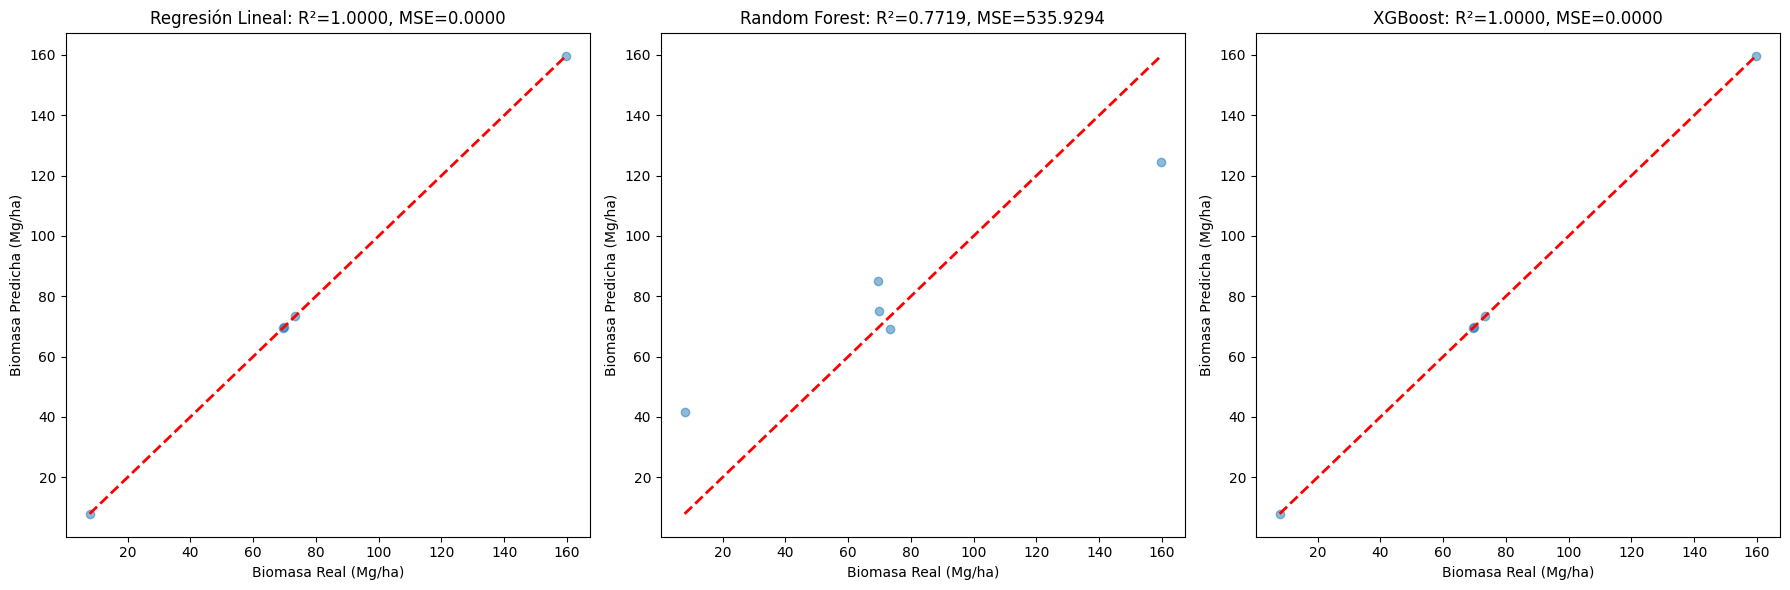

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suprimir advertencias
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

# Cargar los datos
df = dataframemg

# Preparar las características y el objetivo
X = df[['_Ubicación GPS_latitude', '_Ubicación GPS_longitude',
        'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt',
        'HT altura del árbol o del fuste 1 (mt)', 'Area (m²)', 'NDVI']]
y = df['Biomasa (Mg/ha)']

# Función para evaluar y graficar resultados
def evaluar_modelo(model, X, y, nombre_modelo, ax):
    # Realizar validación cruzada
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

    # Ajustar el modelo a todos los datos
    model.fit(X, y)

    # Generar predicciones
    y_pred = model.predict(X)

    # Calcular R² y MSE
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    print(f"Resultados de {nombre_modelo}:")
    print(f"R² medio (validación cruzada): {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"R² (todos los datos): {r2:.4f}")
    print(f"MSE (todos los datos): {mse:.4f}")

    # Graficar resultados en el eje dado (ax)
    ax.scatter(y, y_pred, alpha=0.5)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    ax.set_xlabel("Biomasa Real (Mg/ha)")
    ax.set_ylabel("Biomasa Predicha (Mg/ha)")
    ax.set_title(f"{nombre_modelo}: R²={r2:.4f}, MSE={mse:.4f}")

    return y_pred

# Crear figura con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Regresión Lineal
lr_model = LinearRegression()
y_pred_lr = evaluar_modelo(lr_model, X, y, "Regresión Lineal", axes[0])

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred_rf = evaluar_modelo(rf_model, X, y, "Random Forest", axes[1])

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
y_pred_xgb = evaluar_modelo(xgb_model, X, y, "XGBoost", axes[2])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()


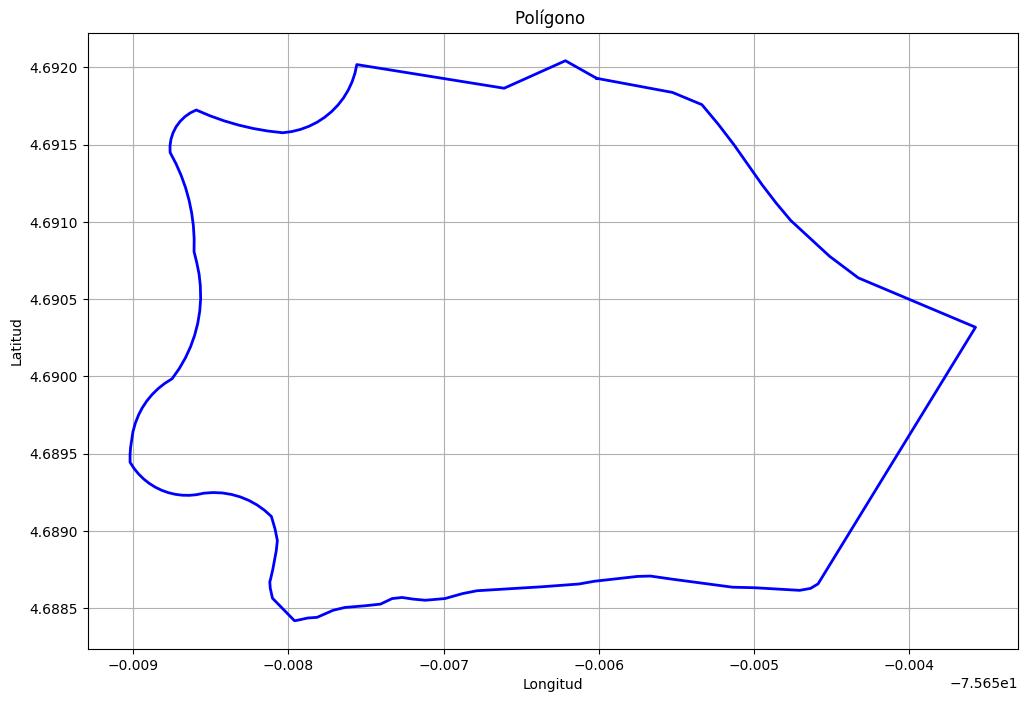

In [ ]:
import matplotlib.pyplot as plt
# Coordenadas del polígono
coordenadas = [[-75.6560144622286, 4.69192930066219], [-75.6555792417039, 4.69184792277146], [-75.6555258509746, 4.69183793926211], [-75.655336249554, 4.69175876839367], [-75.6552300335369, 4.69163079251186], [-75.6551291642854, 4.69149853379347], [-75.6550338137726, 4.69136221598133], [-75.6549489827794, 4.69124089074947], [-75.6549487481279, 4.69124057703611], [-75.6548591208862, 4.69112326665706], [-75.6548589020152, 4.69112299802631], [-75.6547643899918, 4.69100955466079], [-75.6545138962908, 4.69077752973122], [-75.6545062951944, 4.69077178700231], [-75.6545041260799, 4.69077014813228], [-75.6544420529584, 4.69072324974622], [-75.654440140035, 4.69072180430928], [-75.6544182398037, 4.69070525807123], [-75.6543288979923, 4.69063775728657], [-75.6540678082047, 4.69052721823367], [-75.653573643749, 4.69031800102348], [-75.6545879033579, 4.68865717817707], [-75.6546362446591, 4.68862786217201], [-75.6547065510611, 4.68861518621853], [-75.6548363595961, 4.68862276514914], [-75.6549964429569, 4.68863211252703], [-75.655139123831, 4.68863562144977], [-75.6555254476252, 4.68868715589648], [-75.6556689039947, 4.68870776606356], [-75.6557522999611, 4.68870524180865], [-75.6560286204176, 4.68867414681087], [-75.6561287491765, 4.68865619670431], [-75.6563683420773, 4.68863824648801], [-75.6567852319587, 4.68861266428247], [-75.6568779235671, 4.68859426951708], [-75.656992355553, 4.68856195978213], [-75.657117515909, 4.68855118963035], [-75.6571961879918, 4.68855836942238], [-75.6572677085099, 4.68856913994768], [-75.6573320768211, 4.68856195991188], [-75.6574071732085, 4.68852605976266], [-75.6575073009857, 4.68851528926892], [-75.657636037566, 4.68850451905728], [-75.6577111337368, 4.68848656934825], [-75.6578154505451, 4.68844048855774], [-75.6578757657446, 4.68843610905951], [-75.657894166683, 4.68843210452508], [-75.6579071518175, 4.68842927778692], [-75.6579121655838, 4.68842818686421], [-75.6579303655041, 4.68842422531379], [-75.6579485654226, 4.6884202646668], [-75.6579610607294, 4.68841861036706], [-75.6579671342961, 4.68842486807232], [-75.6580644080953, 4.6885251374011], [-75.6580965891928, 4.68855794494151], [-75.6581029337193, 4.68856441276097], [-75.6581172378135, 4.68862951142534], [-75.6581200983982, 4.68867067786952], [-75.6581151329923, 4.68868798272674], [-75.6581000437883, 4.68875426018468], [-75.6580823583785, 4.68884881142676], [-75.6580783972939, 4.68887252882326], [-75.6580714049963, 4.68893736814406], [-75.6580860599654, 4.68901120590753], [-75.6581097618446, 4.68909327791134], [-75.6581538583662, 4.68913326763643], [-75.6581539567064, 4.68913335341812], [-75.658202301924, 4.68916798754452], [-75.6582024335922, 4.68916807851677], [-75.6582544699761, 4.68919695421844], [-75.6582545635833, 4.68919700413053], [-75.6583096530626, 4.68921974252512], [-75.6583668605296, 4.68923596171621], [-75.6583669776026, 4.68923599238991], [-75.6584256231195, 4.68924552073523], [-75.6584257798537, 4.68924554365456], [-75.6584851752596, 4.68924826554555], [-75.658485286983, 4.68924826818332], [-75.6585447124517, 4.68924413183219], [-75.658593266054, 4.68923416587721], [-75.6586386126531, 4.68923010789063], [-75.6586840151042, 4.68923096735339], [-75.6586841313285, 4.6892309721097], [-75.6587292004043, 4.68923673919105], [-75.6587292913807, 4.68923675323769], [-75.6587734190464, 4.68924734624377], [-75.6587735670385, 4.68924738511651], [-75.658816445875, 4.68926273742885], [-75.6588578799496, 4.68928290259045], [-75.6588580194669, 4.68928297368987], [-75.6588971441046, 4.68930764377893], [-75.6589332144868, 4.68933635291118], [-75.6589333434192, 4.68933646015037], [-75.6589661952275, 4.68936907389427], [-75.6589951899885, 4.6894049659649], [-75.6589952879458, 4.68940509272853], [-75.6590202893651, 4.68944408294681], [-75.6590204190842, 4.68949187946244], [-75.6590170872486, 4.68953955955882], [-75.6590103105871, 4.68958687014019], [-75.6590019911315, 4.68964053866842], [-75.6590019416165, 4.68964081550346], [-75.6590018899998, 4.68964110318655], [-75.6590018695208, 4.68964120796125], [-75.6590013191414, 4.6896432753196], [-75.6589964233819, 4.68966164166393], [-75.65898774496, 4.6896941990745], [-75.6589877101868, 4.68969431472012], [-75.6589876913591, 4.68969436719272], [-75.6589861642941, 4.6896983390491], [-75.6589780103468, 4.68971954919219], [-75.6589680399829, 4.6897454837403], [-75.6589679862607, 4.68974561290797], [-75.6589650291229, 4.68975138277085], [-75.658953970078, 4.68977296399375], [-75.6589430005886, 4.68979437001562], [-75.6589429243185, 4.6897945099859], [-75.6589381626867, 4.6898017750703], [-75.6589244490068, 4.68982269818723], [-75.6589129035918, 4.68984031393257], [-75.6589128114157, 4.68984044784359], [-75.6589058861147, 4.68984889100784], [-75.6588897601936, 4.68986855352051], [-75.6588780882477, 4.68988278762122], [-75.6588779879981, 4.68988290373655], [-75.6588685886292, 4.68989214827173], [-75.6588503153348, 4.68991012220596], [-75.6588389384606, 4.68992131392844], [-75.6588388539037, 4.68992139301026], [-75.6588266911508, 4.68993103332118], [-75.658806591965, 4.68994696585262], [-75.6587959074735, 4.68995543633344], [-75.6587958515248, 4.68995547810664], [-75.6587952945391, 4.68995584702602], [-75.6587803858839, 4.68996525725519], [-75.6587494760165, 4.68998477039272], [-75.658747620837, 4.68998741966008], [-75.6587192205596, 4.69002796420463], [-75.6587037360445, 4.69005006890346], [-75.6587036667535, 4.6900501736305], [-75.658697504499, 4.69006091247705], [-75.6586774932126, 4.69009578950198], [-75.6586639639767, 4.69011936813031], [-75.658663917552, 4.69011945301516], [-75.6586588138769, 4.69013055863879], [-75.658642005958, 4.69016713241175], [-75.6586305786508, 4.69019199632509], [-75.65863055753, 4.69019204419592], [-75.6586304249655, 4.69019239710224], [-75.6586264757455, 4.69020353972587], [-75.6586131062831, 4.69024125595013], [-75.6586038709539, 4.6902673104276], [-75.6586038512643, 4.69026736641845], [-75.658600892363, 4.69027891666373], [-75.6585909624524, 4.69031767951466], [-75.6585840949797, 4.69034448641954], [-75.6585840268071, 4.69034478099586], [-75.6585821500045, 4.69035635513669], [-75.6585757057234, 4.69039610323424], [-75.658571237196, 4.69042367216465], [-75.6585712331167, 4.69042371417294], [-75.6585704160108, 4.69043523712719], [-75.6585675742506, 4.69047534783056], [-75.6585655857474, 4.69050342095485], [-75.6585658041806, 4.69051483602479], [-75.6585667574112, 4.69056441062902], [-75.6585671205054, 4.69058327582547], [-75.65856712226, 4.6905833400201], [-75.6585676855343, 4.69058848511441], [-75.6585758304733, 4.69066279783772], [-75.6585904084791, 4.69073520346883], [-75.6585904914632, 4.69073560593231], [-75.6586081158155, 4.69080774835324], [-75.6586073483917, 4.6908912243268], [-75.6586073478942, 4.69089132196142], [-75.6586124187731, 4.69097456571168], [-75.6586124319309, 4.69097474292895], [-75.6586233073415, 4.69105737469376], [-75.6586233393224, 4.69105760076706], [-75.6586399671726, 4.6911392407469], [-75.6586400189399, 4.69113948494107], [-75.6586623189016, 4.69121975508695], [-75.6586623869022, 4.69121999208186], [-75.6586902677788, 4.69129854204611], [-75.6586903349872, 4.69129872509875], [-75.6587236704926, 4.6913751791494], [-75.6587237213177, 4.69137529496893], [-75.6587623859737, 4.69144932348116], [-75.6587629763844, 4.69149249950684], [-75.658762972955, 4.69149256470515], [-75.6587566446897, 4.69153523445856], [-75.6587566269196, 4.69153532391581], [-75.6587435526553, 4.69157639771882], [-75.658743517612, 4.69157649829662], [-75.6587240325056, 4.6916149274216], [-75.6587239758277, 4.69161503277695], [-75.6586985770098, 4.69164983163778], [-75.6586985134732, 4.6916499125703], [-75.6586678524145, 4.69168017966245], [-75.6586677958418, 4.69168023288543], [-75.6586326249656, 4.69170519769324], [-75.6585938995653, 4.6917241714766], [-75.6585049636655, 4.69168648083772], [-75.6585047979994, 4.69168641872534], [-75.6584140339161, 4.69165392556581], [-75.6584137766788, 4.69165384639193], [-75.6583214074384, 4.69162661504893], [-75.6583211165465, 4.69162654364158], [-75.6582273798989, 4.69160463516753], [-75.6582270877704, 4.69160458123561], [-75.6581322605047, 4.69158805947448], [-75.6581320812446, 4.69158803620779], [-75.6580363546036, 4.69157693891415], [-75.6579787242805, 4.69158456205124], [-75.6579785716574, 4.6915845852457], [-75.6579220766151, 4.69159861606186], [-75.6579219969803, 4.69159863729537], [-75.6578674545596, 4.69161887826412], [-75.6578673346267, 4.6916189250299], [-75.6578153826523, 4.69164513335961], [-75.6578152632854, 4.69164519730318], [-75.6577664413981, 4.69167711583966], [-75.657721573944, 4.69171420173084], [-75.6577214520916, 4.69171430665212], [-75.6576809653526, 4.69175618915202], [-75.6576808817366, 4.69175627703066], [-75.6576808117389, 4.69175636597992], [-75.6576453522741, 4.6918023517699], [-75.6576452992097, 4.69180242243105], [-75.6576452154841, 4.69180253586754], [-75.6576451210785, 4.69180268659276], [-75.6576150566221, 4.6918522315699], [-75.6576149605104, 4.69185239411695], [-75.657614908067, 4.69185248471489], [-75.6576148005477, 4.69185271013797], [-75.6575904529664, 4.69190524014478], [-75.6575903775136, 4.69190540752585], [-75.6575903337595, 4.6919055083872], [-75.6575902490896, 4.69190575137246], [-75.6575718475415, 4.69196078682217], [-75.6575717975448, 4.69196094786308], [-75.6575717653511, 4.69196108760557], [-75.6575595281818, 4.69201811262632], [-75.6568396331683, 4.69190205344565], [-75.6566102778585, 4.69186507723352], [-75.6565015474739, 4.69191411842344], [-75.6562154846527, 4.6920431425841], [-75.6560144622286, 4.69192930066219]]

# Convertir las coordenadas a dos listas: una de longitudes y otra de latitudes
longitudes, latitudes = zip(*coordenadas)

# Crear la figura y el gráfico
plt.figure(figsize=(12, 8))

# Graficar las líneas del polígono
plt.plot(longitudes, latitudes, linestyle='-', color='blue', linewidth=2)

# Cerrar el polígono conectando el último punto con el primero
plt.plot([longitudes[-1], longitudes[0]], [latitudes[-1], latitudes[0]], linestyle='-', color='blue', linewidth=2)

# Añadir etiquetas y mostrar la figura
plt.title('Polígono ')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


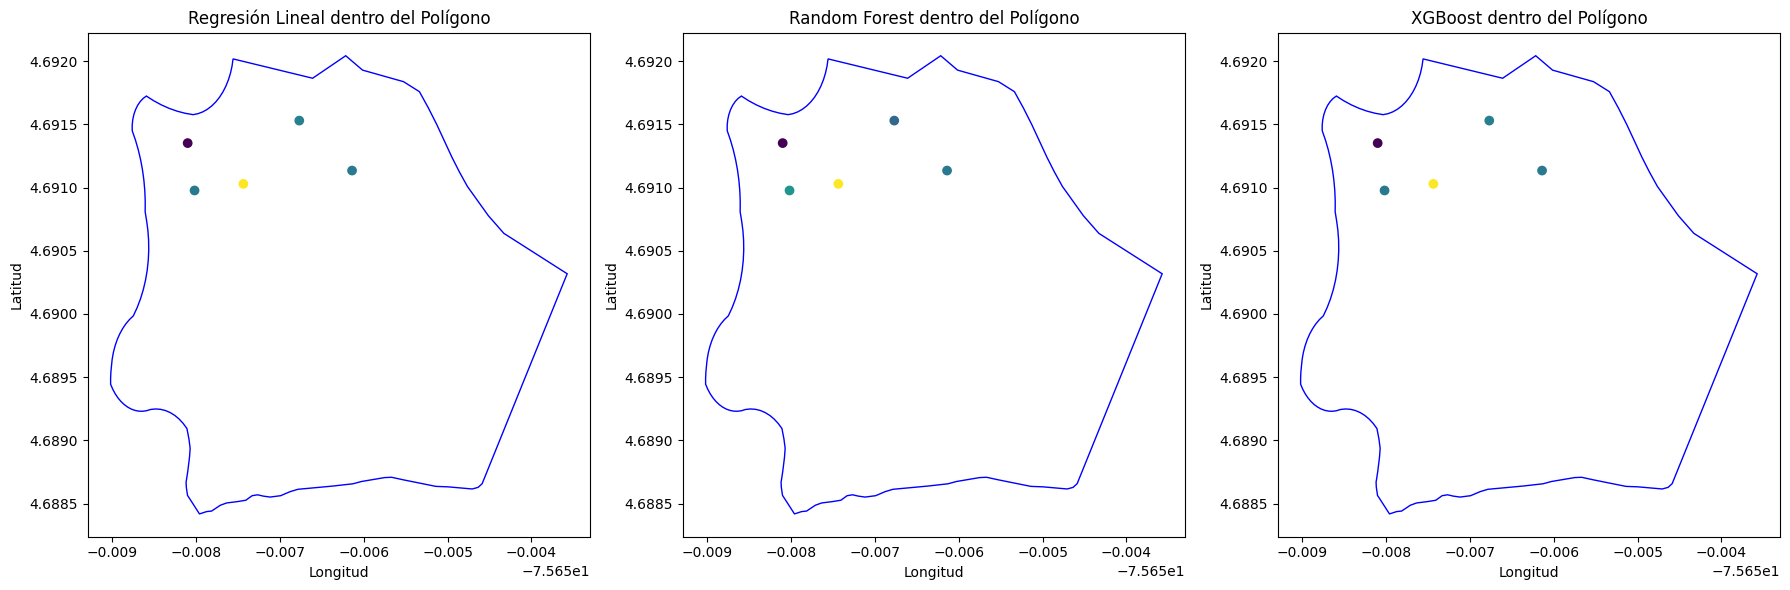

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
from shapely.geometry import Polygon as ShapelyPolygon
from shapely.geometry import Point

# Suprimir advertencias
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

# Cargar los datos
df = dataframemg

# Preparar las características y el objetivo
X = df[['_Ubicación GPS_latitude', '_Ubicación GPS_longitude',
        'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt',
        'HT altura del árbol o del fuste 1 (mt)', 'Area (m²)', 'NDVI']]
y = df['Biomasa (Mg/ha)']

# Definir el polígono base como ejemplo (sustituir por el polígono real)
# Asegúrate de tener las coordenadas del polígono en formato adecuado
polygon_coords = [[-75.6560144622286, 4.69192930066219], [-75.6555792417039, 4.69184792277146], [-75.6555258509746, 4.69183793926211], [-75.655336249554, 4.69175876839367], [-75.6552300335369, 4.69163079251186], [-75.6551291642854, 4.69149853379347], [-75.6550338137726, 4.69136221598133], [-75.6549489827794, 4.69124089074947], [-75.6549487481279, 4.69124057703611], [-75.6548591208862, 4.69112326665706], [-75.6548589020152, 4.69112299802631], [-75.6547643899918, 4.69100955466079], [-75.6545138962908, 4.69077752973122], [-75.6545062951944, 4.69077178700231], [-75.6545041260799, 4.69077014813228], [-75.6544420529584, 4.69072324974622], [-75.654440140035, 4.69072180430928], [-75.6544182398037, 4.69070525807123], [-75.6543288979923, 4.69063775728657], [-75.6540678082047, 4.69052721823367], [-75.653573643749, 4.69031800102348], [-75.6545879033579, 4.68865717817707], [-75.6546362446591, 4.68862786217201], [-75.6547065510611, 4.68861518621853], [-75.6548363595961, 4.68862276514914], [-75.6549964429569, 4.68863211252703], [-75.655139123831, 4.68863562144977], [-75.6555254476252, 4.68868715589648], [-75.6556689039947, 4.68870776606356], [-75.6557522999611, 4.68870524180865], [-75.6560286204176, 4.68867414681087], [-75.6561287491765, 4.68865619670431], [-75.6563683420773, 4.68863824648801], [-75.6567852319587, 4.68861266428247], [-75.6568779235671, 4.68859426951708], [-75.656992355553, 4.68856195978213], [-75.657117515909, 4.68855118963035], [-75.6571961879918, 4.68855836942238], [-75.6572677085099, 4.68856913994768], [-75.6573320768211, 4.68856195991188], [-75.6574071732085, 4.68852605976266], [-75.6575073009857, 4.68851528926892], [-75.657636037566, 4.68850451905728], [-75.6577111337368, 4.68848656934825], [-75.6578154505451, 4.68844048855774], [-75.6578757657446, 4.68843610905951], [-75.657894166683, 4.68843210452508], [-75.6579071518175, 4.68842927778692], [-75.6579121655838, 4.68842818686421], [-75.6579303655041, 4.68842422531379], [-75.6579485654226, 4.6884202646668], [-75.6579610607294, 4.68841861036706], [-75.6579671342961, 4.68842486807232], [-75.6580644080953, 4.6885251374011], [-75.6580965891928, 4.68855794494151], [-75.6581029337193, 4.68856441276097], [-75.6581172378135, 4.68862951142534], [-75.6581200983982, 4.68867067786952], [-75.6581151329923, 4.68868798272674], [-75.6581000437883, 4.68875426018468], [-75.6580823583785, 4.68884881142676], [-75.6580783972939, 4.68887252882326], [-75.6580714049963, 4.68893736814406], [-75.6580860599654, 4.68901120590753], [-75.6581097618446, 4.68909327791134], [-75.6581538583662, 4.68913326763643], [-75.6581539567064, 4.68913335341812], [-75.658202301924, 4.68916798754452], [-75.6582024335922, 4.68916807851677], [-75.6582544699761, 4.68919695421844], [-75.6582545635833, 4.68919700413053], [-75.6583096530626, 4.68921974252512], [-75.6583668605296, 4.68923596171621], [-75.6583669776026, 4.68923599238991], [-75.6584256231195, 4.68924552073523], [-75.6584257798537, 4.68924554365456], [-75.6584851752596, 4.68924826554555], [-75.658485286983, 4.68924826818332], [-75.6585447124517, 4.68924413183219], [-75.658593266054, 4.68923416587721], [-75.6586386126531, 4.68923010789063], [-75.6586840151042, 4.68923096735339], [-75.6586841313285, 4.6892309721097], [-75.6587292004043, 4.68923673919105], [-75.6587292913807, 4.68923675323769], [-75.6587734190464, 4.68924734624377], [-75.6587735670385, 4.68924738511651], [-75.658816445875, 4.68926273742885], [-75.6588578799496, 4.68928290259045], [-75.6588580194669, 4.68928297368987], [-75.6588971441046, 4.68930764377893], [-75.6589332144868, 4.68933635291118], [-75.6589333434192, 4.68933646015037], [-75.6589661952275, 4.68936907389427], [-75.6589951899885, 4.6894049659649], [-75.6589952879458, 4.68940509272853], [-75.6590202893651, 4.68944408294681], [-75.6590204190842, 4.68949187946244], [-75.6590170872486, 4.68953955955882], [-75.6590103105871, 4.68958687014019], [-75.6590019911315, 4.68964053866842], [-75.6590019416165, 4.68964081550346], [-75.6590018899998, 4.68964110318655], [-75.6590018695208, 4.68964120796125], [-75.6590013191414, 4.6896432753196], [-75.6589964233819, 4.68966164166393], [-75.65898774496, 4.6896941990745], [-75.6589877101868, 4.68969431472012], [-75.6589876913591, 4.68969436719272], [-75.6589861642941, 4.6896983390491], [-75.6589780103468, 4.68971954919219], [-75.6589680399829, 4.6897454837403], [-75.6589679862607, 4.68974561290797], [-75.6589650291229, 4.68975138277085], [-75.658953970078, 4.68977296399375], [-75.6589430005886, 4.68979437001562], [-75.6589429243185, 4.6897945099859], [-75.6589381626867, 4.6898017750703], [-75.6589244490068, 4.68982269818723], [-75.6589129035918, 4.68984031393257], [-75.6589128114157, 4.68984044784359], [-75.6589058861147, 4.68984889100784], [-75.6588897601936, 4.68986855352051], [-75.6588780882477, 4.68988278762122], [-75.6588779879981, 4.68988290373655], [-75.6588685886292, 4.68989214827173], [-75.6588503153348, 4.68991012220596], [-75.6588389384606, 4.68992131392844], [-75.6588388539037, 4.68992139301026], [-75.6588266911508, 4.68993103332118], [-75.658806591965, 4.68994696585262], [-75.6587959074735, 4.68995543633344], [-75.6587958515248, 4.68995547810664], [-75.6587952945391, 4.68995584702602], [-75.6587803858839, 4.68996525725519], [-75.6587494760165, 4.68998477039272], [-75.658747620837, 4.68998741966008], [-75.6587192205596, 4.69002796420463], [-75.6587037360445, 4.69005006890346], [-75.6587036667535, 4.6900501736305], [-75.658697504499, 4.69006091247705], [-75.6586774932126, 4.69009578950198], [-75.6586639639767, 4.69011936813031], [-75.658663917552, 4.69011945301516], [-75.6586588138769, 4.69013055863879], [-75.658642005958, 4.69016713241175], [-75.6586305786508, 4.69019199632509], [-75.65863055753, 4.69019204419592], [-75.6586304249655, 4.69019239710224], [-75.6586264757455, 4.69020353972587], [-75.6586131062831, 4.69024125595013], [-75.6586038709539, 4.6902673104276], [-75.6586038512643, 4.69026736641845], [-75.658600892363, 4.69027891666373], [-75.6585909624524, 4.69031767951466], [-75.6585840949797, 4.69034448641954], [-75.6585840268071, 4.69034478099586], [-75.6585821500045, 4.69035635513669], [-75.6585757057234, 4.69039610323424], [-75.658571237196, 4.69042367216465], [-75.6585712331167, 4.69042371417294], [-75.6585704160108, 4.69043523712719], [-75.6585675742506, 4.69047534783056], [-75.6585655857474, 4.69050342095485], [-75.6585658041806, 4.69051483602479], [-75.6585667574112, 4.69056441062902], [-75.6585671205054, 4.69058327582547], [-75.65856712226, 4.6905833400201], [-75.6585676855343, 4.69058848511441], [-75.6585758304733, 4.69066279783772], [-75.6585904084791, 4.69073520346883], [-75.6585904914632, 4.69073560593231], [-75.6586081158155, 4.69080774835324], [-75.6586073483917, 4.6908912243268], [-75.6586073478942, 4.69089132196142], [-75.6586124187731, 4.69097456571168], [-75.6586124319309, 4.69097474292895], [-75.6586233073415, 4.69105737469376], [-75.6586233393224, 4.69105760076706], [-75.6586399671726, 4.6911392407469], [-75.6586400189399, 4.69113948494107], [-75.6586623189016, 4.69121975508695], [-75.6586623869022, 4.69121999208186], [-75.6586902677788, 4.69129854204611], [-75.6586903349872, 4.69129872509875], [-75.6587236704926, 4.6913751791494], [-75.6587237213177, 4.69137529496893], [-75.6587623859737, 4.69144932348116], [-75.6587629763844, 4.69149249950684], [-75.658762972955, 4.69149256470515], [-75.6587566446897, 4.69153523445856], [-75.6587566269196, 4.69153532391581], [-75.6587435526553, 4.69157639771882], [-75.658743517612, 4.69157649829662], [-75.6587240325056, 4.6916149274216], [-75.6587239758277, 4.69161503277695], [-75.6586985770098, 4.69164983163778], [-75.6586985134732, 4.6916499125703], [-75.6586678524145, 4.69168017966245], [-75.6586677958418, 4.69168023288543], [-75.6586326249656, 4.69170519769324], [-75.6585938995653, 4.6917241714766], [-75.6585049636655, 4.69168648083772], [-75.6585047979994, 4.69168641872534], [-75.6584140339161, 4.69165392556581], [-75.6584137766788, 4.69165384639193], [-75.6583214074384, 4.69162661504893], [-75.6583211165465, 4.69162654364158], [-75.6582273798989, 4.69160463516753], [-75.6582270877704, 4.69160458123561], [-75.6581322605047, 4.69158805947448], [-75.6581320812446, 4.69158803620779], [-75.6580363546036, 4.69157693891415], [-75.6579787242805, 4.69158456205124], [-75.6579785716574, 4.6915845852457], [-75.6579220766151, 4.69159861606186], [-75.6579219969803, 4.69159863729537], [-75.6578674545596, 4.69161887826412], [-75.6578673346267, 4.6916189250299], [-75.6578153826523, 4.69164513335961], [-75.6578152632854, 4.69164519730318], [-75.6577664413981, 4.69167711583966], [-75.657721573944, 4.69171420173084], [-75.6577214520916, 4.69171430665212], [-75.6576809653526, 4.69175618915202], [-75.6576808817366, 4.69175627703066], [-75.6576808117389, 4.69175636597992], [-75.6576453522741, 4.6918023517699], [-75.6576452992097, 4.69180242243105], [-75.6576452154841, 4.69180253586754], [-75.6576451210785, 4.69180268659276], [-75.6576150566221, 4.6918522315699], [-75.6576149605104, 4.69185239411695], [-75.657614908067, 4.69185248471489], [-75.6576148005477, 4.69185271013797], [-75.6575904529664, 4.69190524014478], [-75.6575903775136, 4.69190540752585], [-75.6575903337595, 4.6919055083872], [-75.6575902490896, 4.69190575137246], [-75.6575718475415, 4.69196078682217], [-75.6575717975448, 4.69196094786308], [-75.6575717653511, 4.69196108760557], [-75.6575595281818, 4.69201811262632], [-75.6568396331683, 4.69190205344565], [-75.6566102778585, 4.69186507723352], [-75.6565015474739, 4.69191411842344], [-75.6562154846527, 4.6920431425841], [-75.6560144622286, 4.69192930066219]]
polygon = ShapelyPolygon(polygon_coords)

# Función para evaluar y graficar resultados dentro del polígono
def evaluar_y_graficar_modelo(model, X, y, nombre_modelo, ax):
    # Ajustar el modelo a todos los datos
    model.fit(X, y)

    # Generar predicciones
    y_pred = model.predict(X)

    # Graficar el polígono
    poly_patch = Polygon(polygon_coords, closed=True, fill=None, edgecolor='blue')
    ax.add_patch(poly_patch)

    # Filtrar las predicciones dentro del polígono
    in_polygon = np.array([polygon.contains(Point(lon, lat)) for lon, lat in zip(X['_Ubicación GPS_longitude'], X['_Ubicación GPS_latitude'])])

    # Graficar las predicciones dentro del polígono
    ax.scatter(X[in_polygon]['_Ubicación GPS_longitude'], X[in_polygon]['_Ubicación GPS_latitude'],
               c=y_pred[in_polygon], cmap='viridis', label=f'{nombre_modelo} Predicciones')

    ax.set_xlabel("Longitud")
    ax.set_ylabel("Latitud")
    ax.set_title(f"{nombre_modelo} dentro del Polígono")

    return y_pred

# Crear figura con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Regresión Lineal
lr_model = LinearRegression()
y_pred_lr = evaluar_y_graficar_modelo(lr_model, X, y, "Regresión Lineal", axes[0])

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred_rf = evaluar_y_graficar_modelo(rf_model, X, y, "Random Forest", axes[1])

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
y_pred_xgb = evaluar_y_graficar_modelo(xgb_model, X, y, "XGBoost", axes[2])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()


In [ ]:
dataframemg.columns

Index(['ID Subparcela', '_Ubicación GPS_latitude', '_Ubicación GPS_longitude',
       'Biomasa (kg)',
       'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt',
       'HT altura del árbol o del fuste 1 (mt)', 'Area (m²)', 'Area (ha)',
       'Biomasa (Mg)', 'Biomasa (Mg/ha)', 'NDVI'],
      dtype='object')

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar los datos (reemplaza la ruta con la tuya si subes un archivo a Colab)
dataframemg = dataframemg

# Leer el archivo CSV
#df = dataframemg

# Filtrar los datos para evitar NaNs en 'Biomasa' y 'NDVI'
dataframemg = dataframemg.dropna(subset=['Biomasa (Mg/ha)', 'NDVI'])

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características (numéricas)
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Verificar cuántos datos tenemos en total
print(f"Número de muestras en el dataset: {len(dataframemg)}")

# Si hay muy pocos datos, reduce el tamaño del conjunto de prueba
if len(dataframemg) < 10:
    test_size = 0.1  # Conjunto de prueba muy pequeño para pocos datos
else:
    test_size = 0.2  # Si hay suficientes datos, usa el 20% para prueba

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42)

# Verificar el tamaño de los conjuntos de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")

# Si el conjunto de prueba tiene menos de 2 muestras, mostrar advertencia personalizada
if len(X_test) < 2:
    print("Advertencia: No hay suficientes datos para evaluar correctamente el modelo.")
else:
    # Crear y entrenar el modelo de Regresión Lineal
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = lr_model.predict(X_test)

    # Evaluar el rendimiento del modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")

    # Graficar las predicciones vs los valores reales
    plt.figure(figsize=(8, 6))

    # Graficar las predicciones
    plt.scatter(y_test, y_pred, color='blue', label='Predicciones')

    # Graficar la línea ideal (valores reales)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')

    # Añadir los valores reales en rojo
    plt.scatter(y_test, y_test, color='red', label='Valores Reales', alpha=0.5)

    # Etiquetas y título
    plt.xlabel('Biomasa Observada (Mg/ha)')
    plt.ylabel('Biomasa Predicha (Mg/ha)')
    plt.title('Comparación de Biomasa Observada vs Predicha (Regresión Lineal)')
    plt.legend()

    # Mostrar gráfico
    plt.show()


Número de muestras en el dataset: 5
Tamaño del conjunto de entrenamiento: 4
Tamaño del conjunto de prueba: 1
Advertencia: No hay suficientes datos para evaluar correctamente el modelo.


Mean Squared Error (MSE): 3.879933476239024e-27
R-squared (R2): 1.0


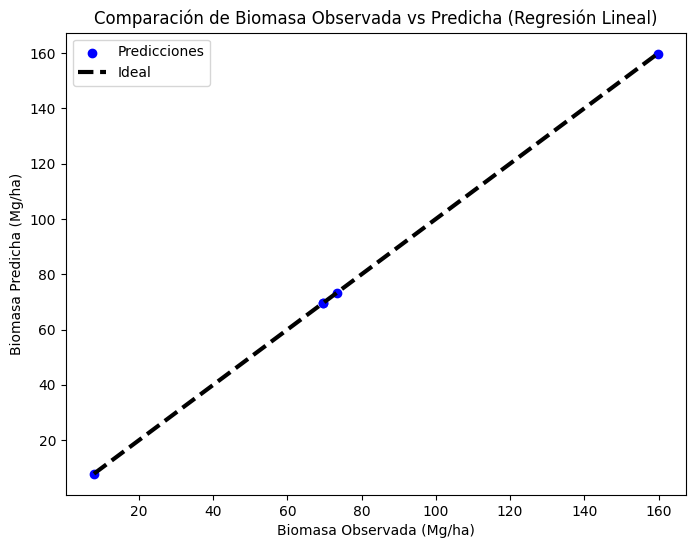

,ID Subparcela,_Ubicación GPS_latitude,_Ubicación GPS_longitude,Biomasa (kg),"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",HT altura del árbol o del fuste 1 (mt),Area (m²),Area (ha),Biomasa (Mg),Biomasa (Mg/ha),NDVI,NDVI_DAP,HT_NDVI,prediccion
0,1,4.690977,-75.658019,4912.348264,12.420664,5.742553,706.858347,0.070686,4.912348,69.495512,0.538725,0.043373,3.093656,69.495512
1,2,4.691029,-75.657437,11291.388977,12.743333,4.933905,706.858347,0.070686,11.291389,159.740477,0.595261,0.046712,2.936960,159.740477
2,3,4.691352,-75.658101,555.487004,39.000000,15.000000,706.858347,0.070686,0.555487,7.858534,0.624996,0.016026,9.374933,7.858534
3,4,4.691530,-75.656770,5184.567362,17.625278,11.180556,706.858347,0.070686,5.184567,73.346624,0.543783,0.030852,6.079793,73.346624
4,5,4.691135,-75.656140,4923.611276,14.536364,7.372093,706.858347,0.070686,4.923611,69.654851,0.541241,0.037234,3.990081,69.654851


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Asegúrate de que 'dataframemg' contiene las columnas 'Biomasa (Mg/ha)' y 'NDVI'
# Filtramos para evitar NaNs en los datos
dataframemg = dataframemg.dropna(subset=['Biomasa (Mg/ha)', 'NDVI'])

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características (ejemplo: numéricas)
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear y entrenar el modelo de Regresión Lineal con todos los datos
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)

# Realizar predicciones con los mismos datos (ya que son pocos)
y_pred = lr_model.predict(X_scaled)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Gráfico de comparación de predicciones vs valores reales
plt.figure(figsize=(8, 6))

# Graficar predicciones
plt.scatter(y, y_pred, color='blue', label='Predicciones')

# Graficar la línea ideal (valores reales)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label='Ideal')

# Añadir los valores reales (en rojo) para mayor claridad
#plt.scatter(y, y, color='red', label='Valores Reales', alpha=0.5)

dataframemg['prediccion'] = y_pred
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de Biomasa Observada vs Predicha (Regresión Lineal)')
plt.legend()

plt.show()
dataframemg

Mejores parámetros encontrados: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Mean Squared Error (MSE): 4585.614419487508
R-squared (R2): -0.9521003375994168


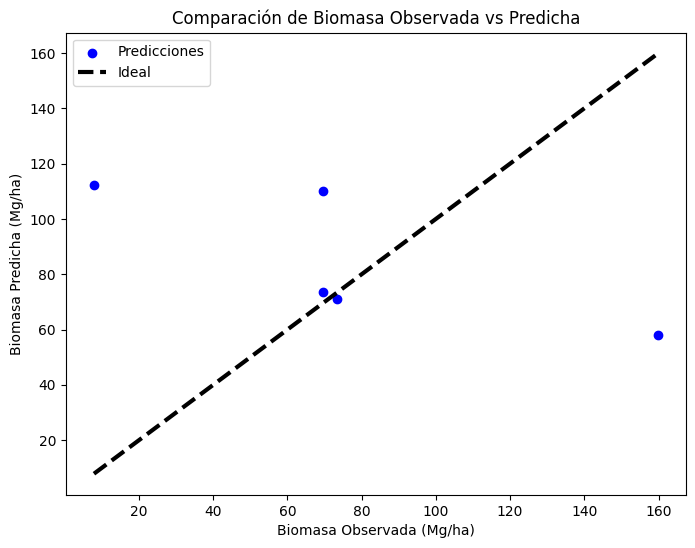

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import UndefinedMetricWarning # import UndefinedMetricWarning


# Suprimir advertencias
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

# Cargar los datos
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características (ejemplo: numéricas)
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configurar el GridSearchCV para optimización de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           verbose=0)  # Desactivar los mensajes de progreso
grid_search.fit(X_scaled, y)
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)
xgb_model = grid_search.best_estimator_

# Configurar el Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Variables para almacenar las predicciones y los verdaderos valores
y_true = []
y_pred = []

# Iterar sobre los diferentes subconjuntos de LOOCV
for train_index, test_index in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenar el modelo con los datos de entrenamiento
    xgb_model.fit(X_train, y_train)

    # Predecir el valor de prueba
    y_predicted = xgb_model.predict(X_test)

    # Almacenar los valores verdaderos y predichos
    y_true.append(y_test.iloc[0])
    y_pred.append(y_predicted[0])

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Gráfico de comparación de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='blue', label='Predicciones')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de Biomasa Observada vs Predicha')
plt.legend()
plt.show()


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Mejor Modelo: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Mean Squared Error (MSE): 4.05969621688868e-07
R-squared (R2): 0.9999999998271784


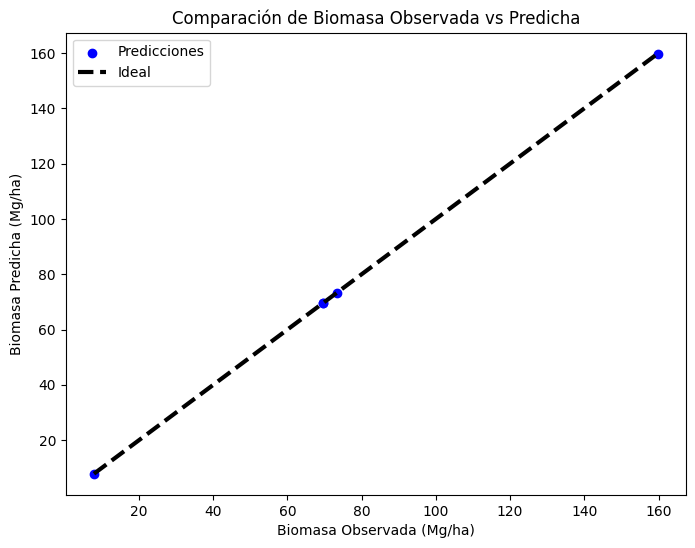

In [ ]:
# @title Modelo de predicción XGBoost Modificado
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV

# Cargar los datos (ajusta la ruta y el nombre del archivo)
dataframemg = dataframemg

# Filtramos para evitar NaNs
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características (ejemplo: numéricas)
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear el modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
    'reg_lambda': [0, 1, 10]  # L2 regularization
}

# Realizar Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Entrenar el modelo con todos los datos
grid_search.fit(X_scaled, y)

# Mejor modelo encontrado por Grid Search
best_model = grid_search.best_estimator_

# Predicciones con el mismo conjunto de datos
y_pred = best_model.predict(X_scaled)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mejor Modelo: {best_model}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Gráfico de comparación de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de Biomasa Observada vs Predicha')
plt.legend()
plt.show()


In [ ]:
dataframemg

,ID Subparcela,_Ubicación GPS_latitude,_Ubicación GPS_longitude,Biomasa (kg),"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",HT altura del árbol o del fuste 1 (mt),Area (m²),Area (ha),Biomasa (Mg),Biomasa (Mg/ha),NDVI,NDVI_DAP,HT_NDVI,prediccion
0,1,4.690977,-75.658019,4912.348264,12.420664,5.742553,706.858347,0.070686,4.912348,69.495512,0.538725,0.043373,3.093656,69.495512
1,2,4.691029,-75.657437,11291.388977,12.743333,4.933905,706.858347,0.070686,11.291389,159.740477,0.595261,0.046712,2.936960,159.740477
2,3,4.691352,-75.658101,555.487004,39.000000,15.000000,706.858347,0.070686,0.555487,7.858534,0.624996,0.016026,9.374933,7.858534
3,4,4.691530,-75.656770,5184.567362,17.625278,11.180556,706.858347,0.070686,5.184567,73.346624,0.543783,0.030852,6.079793,73.346624
4,5,4.691135,-75.656140,4923.611276,14.536364,7.372093,706.858347,0.070686,4.923611,69.654851,0.541241,0.037234,3.990081,69.654851


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Mejor Modelo: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Mean Squared Error (MSE): 7919.076932834295
R-squared (R2): nan


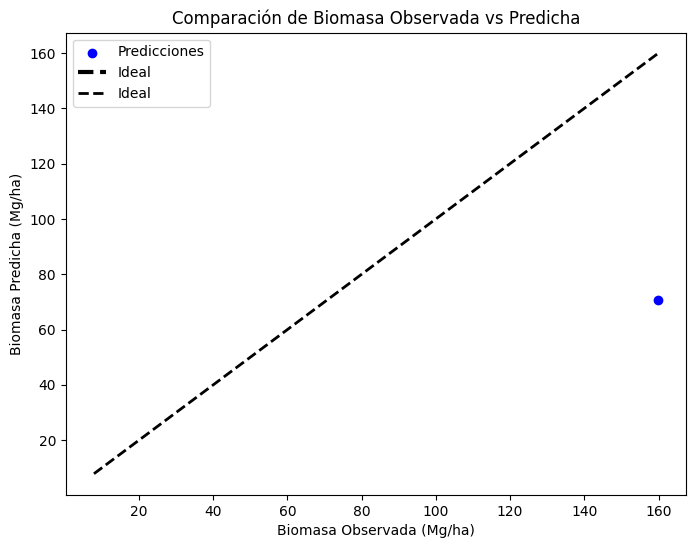

In [ ]:
# @title Modelo de predicción  XGBoost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Cargar los datos (ajusta la ruta y el nombre del archivo)
dataframemg = dataframemg

# Filtramos para evitar NaNs
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características (ejemplo: numéricas)
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
    'reg_lambda': [0, 1, 10]  # L2 regularization
}

# Realizar Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado por Grid Search
best_model = grid_search.best_estimator_

# Predicciones
y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejor Modelo: {best_model}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Gráfico de comparación de predicciones vs valores reales
# ... (código original)
# Gráfico de comparación de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de Biomasa Observada vs Predicha')
plt.legend()
plt.show()


Mean Squared Error (MSE): 15785.008113352338
R-squared (R2): nan


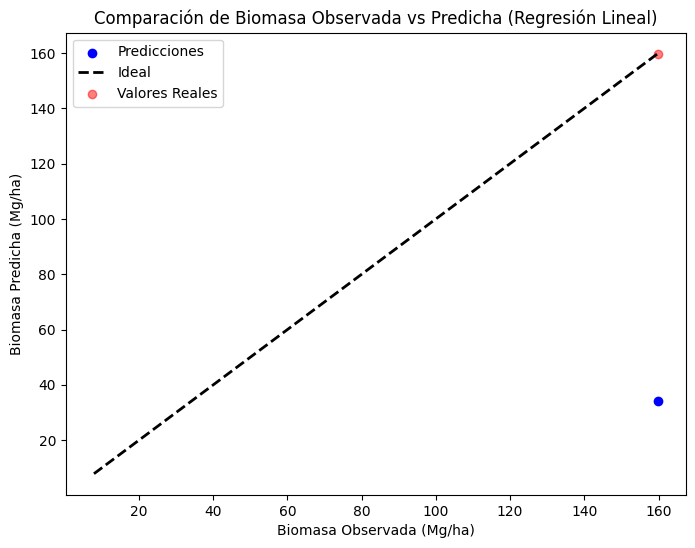

In [ ]:
# @title Modelo de predicción de RL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#import mplcursors

# Asegúrate de que 'dataframemg' contiene las columnas 'Biomasa' y 'NDVI'
# Filtramos para evitar NaNs en los datos
dataframemg = dataframemg.dropna(subset=['Biomasa (Mg/ha)', 'NDVI'])

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características (ejemplo: numéricas)
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = lr_model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Gráfico de comparación de predicciones vs valores reales
plt.figure(figsize=(8, 6))

# Graficar predicciones
scatter_pred = plt.scatter(y_test, y_pred, color='blue', label='Predicciones')

# Graficar la línea ideal (valores reales)
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal')
# Añadir los valores reales (en rojo) para mayor claridad
scatter_real = plt.scatter(y_test, y_test, color='red', label='Valores Reales', alpha=0.5)

plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de Biomasa Observada vs Predicha (Regresión Lineal)')
plt.legend()

# Añadir tooltips interactivos con mplcursors
'''cursor = mplcursors.cursor(scatter_pred, highlight=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f"Observada: {sel.target[0]:.2f}\nPredicha: {sel.target[1]:.2f}"
))'''

plt.show()


Fitting 4 folds for each of 108 candidates, totalling 432 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Mean Squared Error (MSE): 9844.866374494684
R-squared (R2): nan


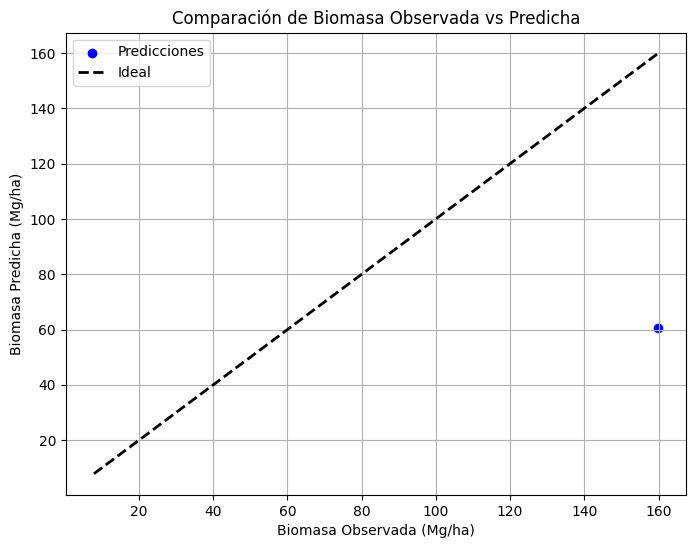

In [ ]:
# @title Modelo de prediccion Random Forest
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Cargar los datos (ajusta la ruta y el nombre del archivo)
dataframemg = dataframemg

# Filtramos para evitar NaNs
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características (ejemplo: numéricas)
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Definir y entrenar un modelo Random Forest con búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor estimador
best_rf = grid_search.best_estimator_

# Predicción y evaluación del modelo
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Visualización de resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de Biomasa Observada vs Predicha')
plt.legend()
plt.grid(True)
plt.show()


Este código compara tres modelos de machine learning para predecir la **biomasa (Mg/ha)** usando varias características: **NDVI**, diámetro del árbol a la altura del pecho, altura del árbol, y combinaciones de estos. Los tres modelos comparados son:

1. **XGBoost**
2. **Regresión Lineal**
3. **Random Forest**

### Resumen de pasos:

1. **Preprocesamiento de datos**:
   - Se eliminan valores nulos y se crean nuevas características: **NDVI/DAP** y **HT\*NDVI**.
   - Los datos se escalan y se dividen en conjuntos de entrenamiento (80%) y prueba (20%).

2. **Entrenamiento y evaluación**:
   - **XGBoost**: Se ajusta el modelo con búsqueda de hiperparámetros usando validación cruzada.
   - **Regresión Lineal**: Se entrena con los datos sin ajustes complejos.
   - **Random Forest**: Se ajusta también con búsqueda de hiperparámetros.
   - Para cada modelo, se calculan el **MSE (Error Cuadrático Medio)** y el **R² (Coeficiente de determinación)** para medir la precisión del modelo.

3. **Visualización**:
   - Se generan gráficos para cada modelo mostrando la relación entre la **biomasa observada** y la **biomasa predicha**.
   - El último gráfico compara los tres modelos en un solo gráfico.

### Comparación:
- **XGBoost** y **Random Forest** pueden manejar relaciones no lineales entre las variables y la biomasa, mientras que la **Regresión Lineal** solo captura relaciones lineales.
- El **MSE** y **R²** te permiten identificar qué modelo predice mejor los valores de biomasa.


Fitting 4 folds for each of 648 candidates, totalling 2592 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Fitting 4 folds for each of 108 candidates, totalling 432 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


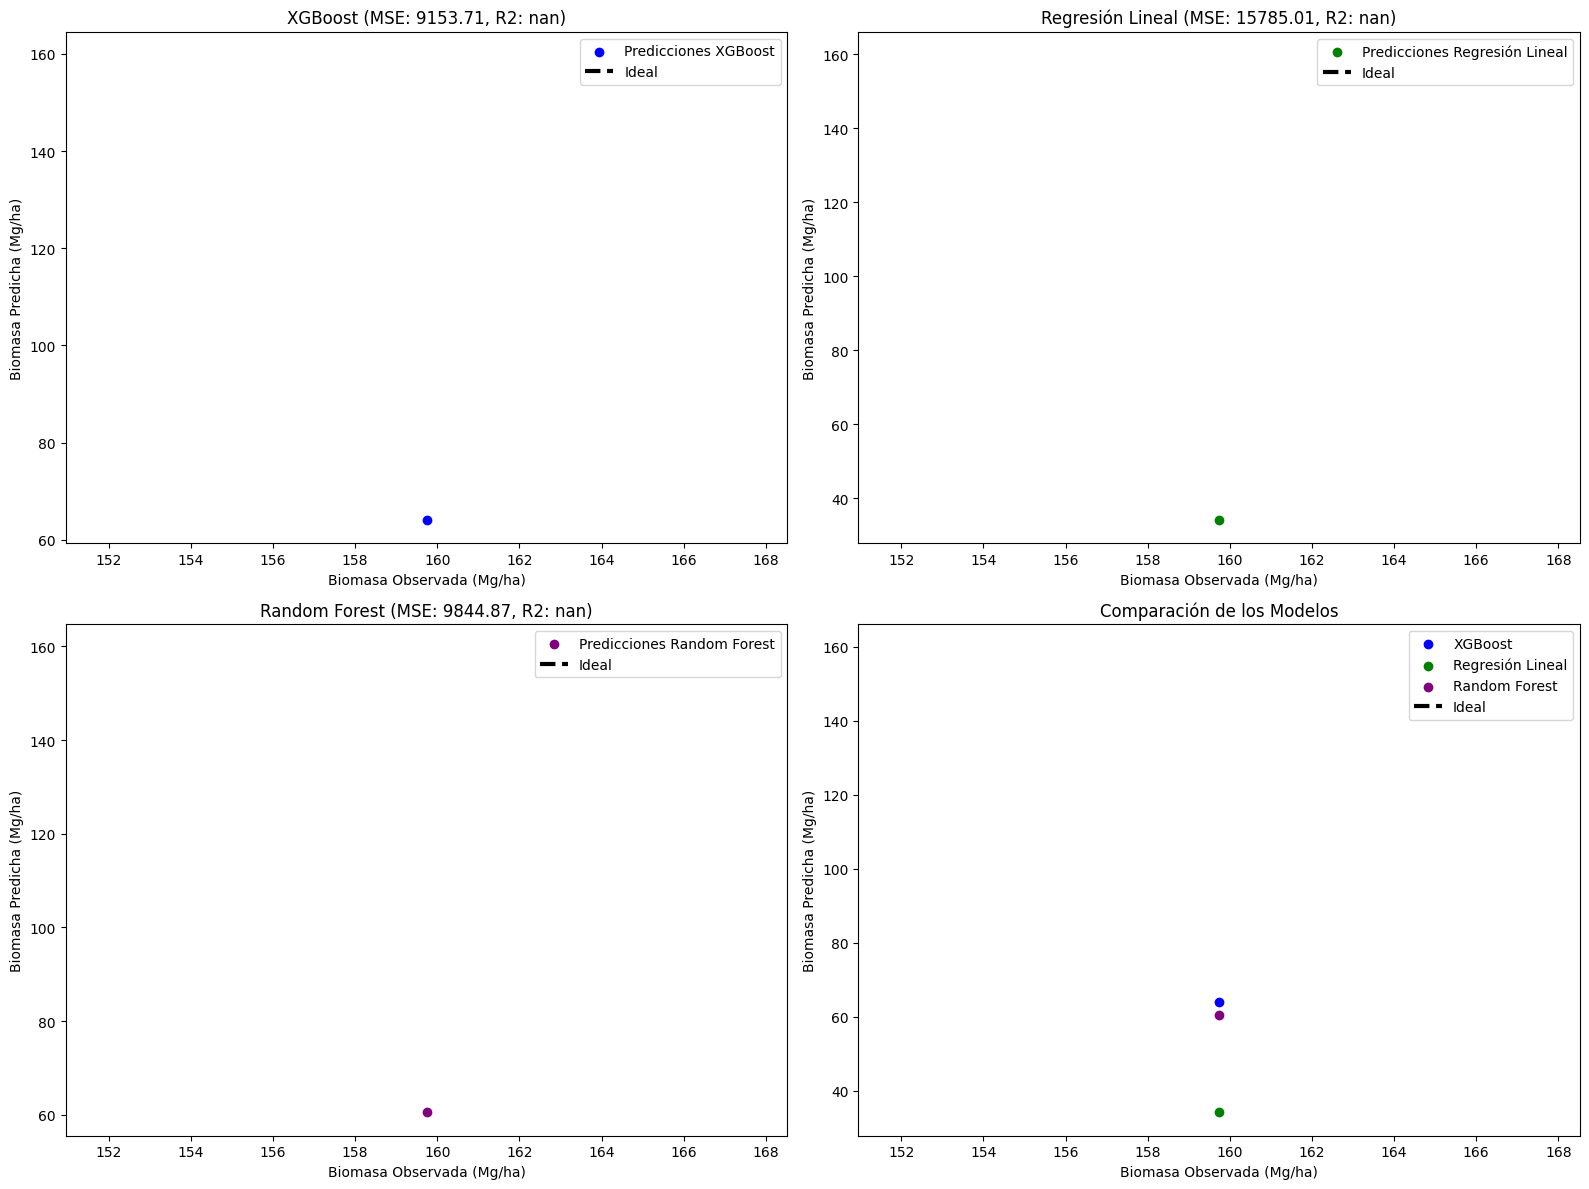

In [ ]:
# @title Comparativo RL - RF - XGBoost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Cargar los datos y asegurarse de que no haya NaNs
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modelo 1: XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 1, 10]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=4, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_

# Predicciones y evaluación
y_pred_xgb = best_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

### Modelo 2: Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

### Modelo 3: Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=4, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Predicciones y evaluación
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

### Gráficas de comparación
plt.figure(figsize=(16, 12))

# Gráfico XGBoost
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_xgb, color='blue', label='Predicciones XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title(f'XGBoost (MSE: {mse_xgb:.2f}, R2: {r2_xgb:.2f})')
plt.legend()

# Gráfico Regresión Lineal
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_lr, color='green', label='Predicciones Regresión Lineal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title(f'Regresión Lineal (MSE: {mse_lr:.2f}, R2: {r2_lr:.2f})')
plt.legend()

# Gráfico Random Forest
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_rf, color='purple', label='Predicciones Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title(f'Random Forest (MSE: {mse_rf:.2f}, R2: {r2_rf:.2f})')
plt.legend()

# Comparación de los tres modelos
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_xgb, color='blue', label='XGBoost')
plt.scatter(y_test, y_pred_lr, color='green', label='Regresión Lineal')
plt.scatter(y_test, y_pred_rf, color='purple', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de los Modelos')
plt.legend()

plt.tight_layout()
plt.show()


Al analizar los gráficos generados por los tres modelos (**XGBoost**, **Regresión Lineal**, y **Random Forest**), se observan los siguientes puntos clave:


### **Conclusión General**:
   - Los tres modelos están fallando en capturar cualquier variabilidad en los datos. Cada uno de ellos está haciendo una predicción constante (o casi constante), lo que sugiere que hay algún problema con los datos de entrada o con la configuración de los modelos.
   - El hecho de que los **valores de R² sean NaN** en todos los modelos es un indicio claro de que las predicciones no varían y no reflejan correctamente la realidad.
   - Es posible que haya un problema en la preparación de los datos o en cómo se están entrenando los modelos. Recomendaría revisar las características de entrada y asegurarse de que los datos tienen suficiente variabilidad y están correctamente escalados.



In [ ]:
dataframemg.columns

Index(['ID Subparcela', '_Ubicación GPS_latitude', '_Ubicación GPS_longitude',
       'Biomasa (kg)',
       'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt',
       'HT altura del árbol o del fuste 1 (mt)', 'Area (m²)', 'Area (ha)',
       'Biomasa (Mg)', 'Biomasa (Mg/ha)', 'NDVI', 'NDVI_DAP', 'HT_NDVI',
       'prediccion'],
      dtype='object')

In [ ]:
# @title Predicciones
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import folium

# Asegurarse de que no haya NaNs
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modelo 1: XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

### Modelo 2: Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

### Modelo 3: Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### Crear un nuevo DataFrame para las predicciones
predicciones_df = pd.DataFrame({
    'Biomasa Observada (Mg/ha)': y_test,
    'Predicción XGBoost (Mg/ha)': y_pred_xgb,
    'Predicción Regresión Lineal (Mg/ha)': y_pred_lr,
    'Predicción Random Forest (Mg/ha)': y_pred_rf
})

# Restablecer el índice de y_test para alinearlo con predicciones_df
y_test = y_test.reset_index(drop=True)

# Asignar las predicciones al DataFrame original
dataframemg_test = dataframemg.iloc[y_test.index].copy()
dataframemg_test['Predicción XGBoost (Mg/ha)'] = y_pred_xgb
dataframemg_test['Predicción Regresión Lineal (Mg/ha)'] = y_pred_lr
dataframemg_test['Predicción Random Forest (Mg/ha)'] = y_pred_rf

### Visualización de los resultados en un mapa
# Suponiendo que tienes las coordenadas geográficas en columnas 'Latitud' y 'Longitud'
dataframemg_test['Ubicación GPS_latitude'] = dataframemg_test['_Ubicación GPS_latitude']
dataframemg_test['Ubicación GPS_longitude'] = dataframemg_test['_Ubicación GPS_longitude']

# Crear un mapa centrado en la ubicación promedio de los puntos
mapa = folium.Map(location=[dataframemg_test['Ubicación GPS_latitude'].mean(), dataframemg_test['Ubicación GPS_longitude'].mean()], zoom_start=10)

# Agregar marcadores al mapa para cada predicción de XGBoost
for index, row in dataframemg_test.iterrows():
    folium.CircleMarker(
        location=[row['Ubicación GPS_latitude'], row['Ubicación GPS_longitude']],
        radius=row['Predicción XGBoost (Mg/ha)'] * 5,  # Ajusta el radio según tu escala
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        popup=f"Biomasa Predicha XGBoost: {row['Predicción XGBoost (Mg/ha)']:.2f} Mg/ha"
    ).add_to(mapa)

# Mostrar el mapa
mapa

### Mostrar el nuevo DataFrame con las predicciones
predicciones_df



,Biomasa Observada (Mg/ha),Predicción XGBoost (Mg/ha),Predicción Regresión Lineal (Mg/ha),Predicción Random Forest (Mg/ha)
1,159.740477,73.345177,34.102075,61.019918


In [ ]:
# @title Comparativo RL - RF - XGBoost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Cargar los datos y asegurarse de que no haya NaNs
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['updated_diameter_mean']
dataframemg['HT_NDVI'] = dataframemg['height_mean'] * dataframemg['NDVI']

# Seleccionar características
numeric_features = ['NDVI', 'updated_diameter_mean', 'height_mean', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modelo 1: XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 1, 10]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=4, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_

# Predicciones y evaluación
y_pred_xgb = best_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

### Modelo 2: Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

### Modelo 3: Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=4, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Predicciones y evaluación
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

### Gráficas de comparación
plt.figure(figsize=(16, 8))

# Gráfico XGBoost
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_xgb, color='blue', label='Predicciones XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title(f'XGBoost (MSE: {mse_xgb:.2f}, R2: {r2_xgb:.2f})')
plt.legend()

# Gráfico Regresión Lineal
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_lr, color='green', label='Predicciones Regresión Lineal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title(f'Regresión Lineal (MSE: {mse_lr:.2f}, R2: {r2_lr:.2f})')
plt.legend()

# Gráfico Random Forest
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_rf, color='purple', label='Predicciones Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title(f'Random Forest (MSE: {mse_rf:.2f}, R2: {r2_rf:.2f})')
plt.legend()

# Comparación de los tres modelos en la fila inferior
plt.subplot(2, 1, 2)
plt.scatter(y_test, y_pred_xgb, color='blue', label='XGBoost')
plt.scatter(y_test, y_pred_lr, color='green', label='Regresión Lineal')
plt.scatter(y_test, y_pred_rf, color='purple', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de los Modelos')
plt.legend()

plt.tight_layout()
plt.show()
